# MSDS 7331 Data Mining Lab2 Assignment
**Team: Sita Daggubati, Chaoshun Hu, Quinton Nixon and Anne Francomano**

- For the Lab 2 assignment we used the New York City crimes data located at NYC Open Data ( https://data.cityofnewyork.us/Public-Safety/NYPD-Complaint-Data-Historic/qgea-i56i/data ).
- The dataset tracks all reported crimes during the period 2016-2017 for the five NYC boroughs. 
- This dataset has additional attributes, such as Victim Age and Gender, which were evaluated for our assignment. 

- In Lab 2 we will: 
    - (1) Predict if the severity of the crime is a Felony or is not a Felony  
    - (2) Predict whether the victim of the crime is Female or is not Female 

<a id="top"></a>
# Lab 2 Contents:
This analysis report is comprised of the following sections:


* <a href="#Data_Preparation_Part_1"> Data_Preparation_Part_1</a>
* <a href="#Data_Preparation_Part_2"> Data_Preparation_Part_2</a>
* <a href="#Modeling_and_Evaluation_1">Modeling_and_Evaluation_1</a>
* <a href="#Modeling_and_Evaluation_2">Modeling_and_Evaluation_2</a>
* <a href="#Modeling_and_Evaluation_3">Modeling_and_Evaluation_3</a>
* <a href="#Modeling_and_Evaluation_4">Modeling_and_Evaluation_4</a>
* <a href="#Modeling_and_Evaluation_5">Modeling_and_Evaluation_5</a>
* <a href="#Modeling_and_Evaluation_6">Modeling_and_Evaluation_6</a>
* <a href="#Deployment">Deployment</a>
* <a href="#Exceptional_Work">Exceptional_Work</a>
* <a href="#References">References</a>

________________________________________________________________________________________________________
<a id="Imports"></a>



<a id="# Data_Preparation_Part_1"></a>

<a href="#top">Back to Top</a>

### Data_Preparation_Part_1

The file "NYPD_Complaint_Data_Historic_2016_2017_U.csv" was created based on data downloaded from NYC Open Data portal at https://data.cityofnewyork.us/Public-Safety/NYPD-Complaint-Data-Historic/qgea-i56i/data , using the following filters and resulted in a core dataset of approximately 900K records:
- Year of Complaint Date is only 2016 or 2017 (CMPLNT_FR_DT)
- Complaint Date is not null (CMPLNT_FR_DT)
- Borough Name is not null (BORO_NM)
- Complaint Severity Level is not null (LAW_CAT_CD)  (used for Task 1 predicting if crime severity level is felony or non-felony) 
- Victim Sex is not null  (VIC_SEX)  (used for Task 2 predicting if crime victim is female or not) 



At the start of the data preparation tasks here in Part 1 (below), please note the following:
- After choosing 30K random records from the large core dataset, we then filter the set where victim gender is M or F. 
    - The resulting data set is used for Both Task 1 and Task 2 predictions.
    - There was a large number of records where gender was D or E, and we were unable to ascertain if these were typos or held a particular meaning. The use of D and E did not seem to be associated with any particular time range in the dataset, but did seem to be used when other victim related information such as vicitim race or age were also unknown. In addition, the use of D and E did not seem to be affiliated with any particular type of crime.
    - Using  only the records where victim gender is Female or Male potentially introduces bias into the modeling at hand.


### Dataset Downloaded from NYC Portal Used for Lab 2     [with additional attributes not used in lab1 & minilab] ###

The downloaded "NYPD_Complaint_Data_Historic_2016_2017_U.csv" data file data set is comprised of the following 35 attributes:

<table>
<tr><th style="text-align: center;">ATTRIBUTE NAME</th><th style="text-align: center;">DATA TYPE</th><th style="text-align: center;">DESCRIPTION</th></tr>

<tr><th style="text-align: left;">CMPLNT_NUM</th>
    <td style="text-align: left;"> Integer</td>
    <td style="text-align: left;">Randomly generated persistent, unique ID for each complaint</td>
</tr>

<tr><th style="text-align: left;">CMPLNT_FR_DT</th>
    <td style="text-align: left;"> String</td>
    <td style="text-align: left;">Exact date of occurrence for the reported event (or starting date of occurrence, if CMPLNT_TO_DT exists)</td>
</tr>

<tr><th style="text-align: left;">CMPLNT_FR_TM</th>
    <td style="text-align: left;"> String</td>
    <td style="text-align: left;">Exact time of occurrence for the reported event (or starting time of occurrence, if CMPLNT_TO_TM exists)</td>
</tr>

<tr><th style="text-align: left;">CMPLNT_TO_DT</th>
    <td style="text-align: left;"> String</td>
    <td style="text-align: left;">Ending date of occurrence for the reported event, if exact time of occurrence is unknown</td>
</tr>

<tr><th style="text-align: left;">CMPLNT_TO_TM</th>
    <td style="text-align: left;"> String</td>
    <td style="text-align: left;"> Ending time of occurrence for the reported event, if exact time of occurrence is unknown</td>
</tr>

<tr><th style="text-align: left;">RPT_DT</th>
    <td style="text-align: left;"> String</td>
    <td style="text-align: left;"> Date event was reported to police</td>
</tr>

<tr><th style="text-align: left;">KY_CD</th>
    <td style="text-align: left;"> Integer</td>
    <td style="text-align: left;"> Three-digit offense classification code</td>
</tr>


<tr><th style="text-align: left;">OFNS_DESC</th>
    <td style="text-align: left;"> Nominal</td>
    <td style="text-align: left;"> Description of offense corresponding with key code in KY_CD</td>
</tr>


<tr><th style="text-align: left;">PD_CD</th>
    <td style="text-align: left;"> Nominal</td>
    <td style="text-align: left;"> Three-digit internal classification code (more granular than Key Code in KY_CD)</td>
</tr>


<tr><th style="text-align: left;">PD_DESC</th>
    <td style="text-align: left;"> Nominal</td>
    <td style="text-align: left;"> Description of internal classification corresponding with PD code (more granular than Offense Description in OFNS_DESC)</td>
</tr>

<tr><th style="text-align: left;">CRM_ATPT_CPTD_CD</th>
    <td style="text-align: left;"> Nominal</td>
    <td style="text-align: left;"> Indicator of whether crime was successfully completed or attempted, but failed or was interrupted prematurely</td>
</tr>

<tr><th style="text-align: left;">LAW_CAT_CD</th>
    <td style="text-align: left;"> Nominal</td>
    <td style="text-align: left;"> Level of offense: felony, misdemeanor, violation</td>
</tr>

<tr><th style="text-align: left;">JURIS_DESC</th>
    <td style="text-align: left;"> Nominal</td>
    <td style="text-align: left;"> Jurisdiction responsible for incident. Either internal, like Police, Transit, and Housing; or external, like Correction, Port Authority, etc.</td>
</tr>

<tr><th style="text-align: left;">BORO_NM</th>
    <td style="text-align: left;"> Nominal</td>
    <td style="text-align: left;"> The name of the borough in which the incident occurred</td>
</tr>

<tr><th style="text-align: left;">ADDR_PCT_CD</th>
    <td style="text-align: left;"> Nominal</td>
    <td style="text-align: left;"> The designated number for the New York City police precinct in which the incident occurred</td>
</tr>

<tr><th style="text-align: left;">LOC_OF_OCCUR_DESC</th>
    <td style="text-align: left;"> Nominal</td>
    <td style="text-align: left;"> Specific location of occurrence in or around the premises; inside, opposite of, front of, rear of</td>
</tr>
<tr><th style="text-align: left;">PREM_TYP_DESC</th>
    <td style="text-align: left;"> Nominal</td>
    <td style="text-align: left;"> Specific description of premises; grocery store, residence, street, etc.</td>
</tr>
<tr><th style="text-align: left;">PARKS_NM</th>
    <td style="text-align: left;"> Nominal</td>
    <td style="text-align: left;"> Name of the New York City park, playground or green space where the complaint occurred, if applicable.  New York State Parks are Not included.</td>
</tr>
<tr><th style="text-align: left;">HADEVELOPT</th>
    <td style="text-align: left;"> Nominal</td>
    <td style="text-align: left;"> Name of the New York City Housing Authority (NYCHA) housing development where complaint occurred, if applicable</td>
</tr>
<tr><th style="text-align: left;">X_COORD_CD</th>
    <td style="text-align: left;"> Float64</td>
    <td style="text-align: left;"> X-coordinate for New York State Plane Coordinate System, Long Island Zone, NAD 83, units feet (FIPS 3104)</td>
X</tr>
<tr><th style="text-align: left;">Y_COORD_CD</th>
    <td style="text-align: left;"> Float64</td>
    <td style="text-align: left;"> Y-coordinate for New York State Plane Coordinate System, Long Island Zone, NAD 83, units feet (FIPS 3104)</td>
</tr>
<tr><th style="text-align: left;">LATITUDE</th>
    <td style="text-align: left;"> Float64</td>
    <td style="text-align: left;"> Midblock Latitude coordinate for Global Coordinate System, WGS 1984, decimal degrees (EPSG 4326)</td>
</tr>
<tr><th style="text-align: left;">LONGITUDE</th>
    <td style="text-align: left;"> Float64</td>
    <td style="text-align: left;"> Midblock Longitude coordinate for Global Coordinate System, WGS 1984,decimal degrees (EPSG 4326)</td>
</tr>
<tr><th style="text-align: left;">LAT_LON</th>
    <td style="text-align: left;"> String</td>
    <td style="text-align: left;"> The Midblock Latitude and Midblock  Longitude coordinate point pair for Global Coordinate System, WGS 1984,decimal degrees (EPSG 4326)</td>
</tr>

<tr><th style="text-align: left;">HOUSING_PSA</th>
    <td style="text-align: left;"> Integer</td>
    <td style="text-align: left;"> Represents the Housing Development Level Code</td>
</tr>
<tr><th style="text-align: left;">JURISDICTION_CODE</th>
    <td style="text-align: left;"> Integer</td>
    <td style="text-align: left;"> Represents the jurisdiction responsible for incident. It takes one of four values from 0 to 3 to indicate different agencies like Police, Transit, Housing, or External.</td>
</tr>
<tr><th style="text-align: left;">PATROL_BORO</th>
    <td style="text-align: left;"> Nominal</td>
    <td style="text-align: left;"> Similar to BORO_NM.  Instead of the name of the borough, this attribute is the name of the patrol borough in which the reported incident took place.</td>
</tr>
<tr><th style="text-align: left;">STATION_NAME</th>
    <td style="text-align: left;"> Nominal</td>
    <td style="text-align: left;"> The name of the transit station in which an incident occurred if it occurred in a transit station.</td>
</tr>
<tr><th style="text-align: left;">SUSP_AGE_GROUP</th>
    <td style="text-align: left;"> Nominal</td>
    <td style="text-align: left;"> A categorical attribute for the age group the suspect falls into (if known)</td>
</tr><tr><th style="text-align: left;">SUSP_RACE</th>
    <td style="text-align: left;"> Nominal</td>
    <td style="text-align: left;"> A categorical attribute corresponding to the ethnicity of the suspect (if known).</td>
</tr><tr><th style="text-align: left;">SUSP_SEX</th>
    <td style="text-align: left;"> Nominal</td>
    <td style="text-align: left;"> The gender of the suspect (if known)</td>
</tr>
</tr><tr><th style="text-align: left;">TRANSIT_DISTRICT</th>
    <td style="text-align: left;"> Nominal</td>
    <td style="text-align: left;"> The name of the transit district in which the incident occurred.</td>
</tr>
</tr><tr><th style="text-align: left;">VIC_AGE_GROUP</th>
    <td style="text-align: left;"> Nominal</td>
    <td style="text-align: left;"> A categorical attribute for the age group the victim falls into (if known).</td>
</tr></tr><tr><th style="text-align: left;">VIC_RACE</th>
    <td style="text-align: left;"> Nominal</td>
    <td style="text-align: left;"> A categorical attribute corresponding to the ethnicity of the victim (if known).</td>
</tr></tr><tr><th style="text-align: left;">VIC_SEX</th>
    <td style="text-align: left;"> Nominal</td>
    <td style="text-align: left;"> The gender of the victim (if known)</td>
</tr>
</table>


The following attributes were deemed to be redundant with respect to other fields and are not required for data exploration and analysis:
- The X_COORD_CD and Y_COORD_CD attributes represent an alternate coordinate system to the information available in the Latitude and Longitude attributes. Only one of the two available coordinate systems is needed.
- The LAT_LON attribute is the concatonation of the individual Latitude and Longitude fields. Therefore, only one or the other is needed, not both.
- The KY_CD field contains the numeric code equivalent of the offense description category (in OFNS_DESC) and only one or the other is necessary.
- The PD_CD field contains the numeric code equivalent of the more granular PD description category (in PD_DESC) and only one or the other is necessary.

#### Imports and Custom Functions

In [38]:
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
#from sklearn.model_selection import StratifiedKFold

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate

from sklearn.preprocessing import StandardScaler
from sklearn import metrics as mt
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.tools as tls

from math import sqrt
from scipy import stats

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore', DeprecationWarning)

In [39]:
# Load the file containing the crimes in new york data
# using only 30k rows of 2016-2017 data. 
dataset = pd.read_csv("NYPD_Complaint_Data_Historic_2016_2017_U.csv", nrows=30000, low_memory=False)

# print the header of the table representing the data
print("done", dataset.shape)
dataset.info()
dataset.head()

done (30000, 35)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 35 columns):
CMPLNT_NUM           30000 non-null int64
CMPLNT_FR_DT         30000 non-null object
CMPLNT_FR_TM         30000 non-null object
CMPLNT_TO_DT         25032 non-null object
CMPLNT_TO_TM         25042 non-null object
ADDR_PCT_CD          30000 non-null int64
RPT_DT               30000 non-null object
KY_CD                30000 non-null int64
OFNS_DESC            29997 non-null object
PD_CD                30000 non-null int64
PD_DESC              30000 non-null object
CRM_ATPT_CPTD_CD     30000 non-null object
LAW_CAT_CD           30000 non-null object
BORO_NM              30000 non-null object
LOC_OF_OCCUR_DESC    24533 non-null object
PREM_TYP_DESC        29912 non-null object
JURIS_DESC           30000 non-null object
JURISDICTION_CODE    30000 non-null int64
PARKS_NM             116 non-null object
HADEVELOPT           1553 non-null object
HOUSING_PSA          2

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,...,SUSP_SEX,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
0,862381535,11/17/2016,13:00:00,12/17/2016,13:30:00,73,12/19/2016,112,THEFT-FRAUD,739,...,NaN,NaN,40.671649,-73.914154,"(40.671649253, -73.914153872)",PATROL BORO BKLYN NORTH,NaN,25-44,BLACK,M
1,989056788,11/17/2016,12:00:00,11/25/2016,12:00:00,111,12/19/2016,109,GRAND LARCENY,422,...,NaN,NaN,40.737499,-73.754141,"(40.737499063, -73.754140785)",PATROL BORO QUEENS NORTH,NaN,45-64,ASIAN / PACIFIC ISLANDER,M
2,137301059,12/31/2016,23:55:00,12/31/2016,23:56:00,14,12/31/2016,235,DANGEROUS DRUGS,511,...,M,NaN,40.756266,-73.990501,"(40.756266207, -73.990501248)",PATROL BORO MAN SOUTH,NaN,UNKNOWN,UNKNOWN,E
3,207736768,12/31/2016,23:40:00,12/31/2016,23:50:00,43,12/31/2016,105,ROBBERY,389,...,M,NaN,40.828755,-73.866594,"(40.828754623, -73.866593516)",PATROL BORO BRONX,NaN,25-44,WHITE HISPANIC,F
4,510076514,12/31/2016,23:30:00,12/31/2016,23:31:00,25,12/31/2016,344,ASSAULT 3 & RELATED OFFENSES,101,...,U,NaN,40.809860,-73.937644,"(40.809859893, -73.937644103)",PATROL BORO MAN NORTH,NaN,UNKNOWN,BLACK,F


In [40]:
# Remove rows with empty or unknown Victim gender 
victim_gender = ['M', 'F']
dataset = dataset[dataset.VIC_SEX.isin(victim_gender)]
print(dataset.shape)
#dataset.info()

(22076, 35)


#### Defining common functions

In [41]:
def fetchMonth(date):
    tokens = str(date).split('/')
    return tokens[0]


def timeOfTheDay(time):
    tokens = str(time).split(':')
    if int(tokens[0]) <= 6:
        return 'night'
    if int(tokens[0]) <= 12:
        return 'before_noon'
    if int(tokens[0]) <= 18:
        return 'after_noon'
    if int(tokens[0]) <= 24:
        return 'evening'


def computeOffenseFlag(offense_level):
    offense_level = str(offense_level)
    if offense_level == 'FELONY':
        return 1
    return 0

def calc_felony_ratio(data):
    felony = data[(data.IsFelony == 1)]
    num_felony= len(felony)
    print('felonies: %d' % num_felony)
    print('all_crimes: %d' % len(data.IsFelony))

    print('Percentage: %f' % ((num_felony / (len(data.IsFelony))) * 100))


def computeVictimFemale(vic_sex):
    vic_sex = str(vic_sex)
    if vic_sex == 'F':
        return 1
    return 0

def calc_female_ratio(data):
    female = data[(data.IsFemale == 1)]
    num_female = len(female)
    print('females: %d' % num_female)
    print('all_crimes: %d' % len(data.IsFemale))

    print('Percentage: %f' % ((num_female / (len(data.IsFemale))) * 100))
    

# function for plotting class accuracies
from matplotlib import pyplot as plt

def per_class_accuracy(ytrue,yhat):
    conf = mt.confusion_matrix(ytrue,yhat)
    norm_conf = conf.astype('float') / conf.sum(axis=1)[:, np.newaxis]
    return np.diag(norm_conf)

def plot_class_acc(ytrue,yhat, xlbl, title=''):
    acc_list = per_class_accuracy(ytrue,yhat)
    plt.bar(range(len(acc_list)), acc_list)
    plt.xlabel("Not " + xlbl + " and " + xlbl)
    plt.ylabel('Accuracy  within class')
    plt.title(title+", Total Acc=%.1f"%(100*mt.accuracy_score(ytrue,yhat)))
    plt.grid()
    plt.show()

In [42]:
# populate empty date fields
dataset.loc[:,'CMPLNT_FR_DT'].fillna('12/01/2015', inplace=True)

# Removing rows with empty boroughs or invalid borough names
#Bourough Check  
boroughs = ['BRONX','BROOKLYN', 'MANHATTAN', 'QUEENS','STATEN ISLAND' ]   
dataset = dataset[dataset.BORO_NM.isin(boroughs)]

# Removing rows with empty offense level or invalid offense level labels
offenseLevel = ['MISDEMEANOR', 'FELONY', 'VIOLATION']
dataset = dataset[dataset.LAW_CAT_CD.isin(offenseLevel)]


In [43]:
# pre process the data
features = dataset[['CMPLNT_FR_DT',
                    'CMPLNT_FR_TM',
                    'BORO_NM']]

#print('FEATURES dataset', features.shape)
#features.info()
#features.head()

In [44]:
# convert the date column into month column
date = dataset.CMPLNT_FR_DT
date = date.apply(lambda x: fetchMonth(x))

# split the time column into day regions
time = dataset.CMPLNT_FR_TM
time = time.fillna('22:00:00')
time = time.apply(lambda x: timeOfTheDay(x))

features.CMPLNT_FR_DT = date
features.CMPLNT_FR_TM = time

#print('FEATURES dataset', features.shape)
#features.info()
features.head()

,CMPLNT_FR_DT,CMPLNT_FR_TM,BORO_NM
0,11,after_noon,BROOKLYN
1,11,before_noon,QUEENS
3,12,evening,BRONX
4,12,evening,MANHATTAN
6,12,evening,QUEENS


- We also one hot encode our categorical features for use in our models. CMPLNT_FR_DT, CMPLNT_FR_TM, and BORO_NM have too many variables for binary coding, so one-hot encoding will be performed. 

In [45]:
# encode the data (we have strings as labels want numerical values)
one_hot_date = pd.get_dummies(features.CMPLNT_FR_DT, prefix ="month")
one_hot_time_of_day = pd.get_dummies(features.CMPLNT_FR_TM)
one_hot_borough = pd.get_dummies(features.BORO_NM)


In [46]:
features.drop('CMPLNT_FR_DT', axis=1, inplace=True)
features.drop('CMPLNT_FR_TM', axis=1, inplace=True)
features.drop('BORO_NM', axis=1, inplace=True)
#print("features.shape ", features.shape)
#features.info()
#features.head()

In [47]:
features = features.join(one_hot_date)
features = features.join(one_hot_time_of_day)
features = features.join(one_hot_borough)

### Store data for Task 2 before any manipulation 
newFeatures = features.copy()

### Data Preparation 1 for Task1 

- In order to Predict whether crimes are felonies or not, we need to make sure we include the new IsFelony attribute

In [48]:
labels = pd.DataFrame()
#law_cat_cd felony
labels['IsFelony'] = dataset.LAW_CAT_CD.apply(lambda x: computeOffenseFlag(x))

#print("labels shape", labels.shape)
#labels.info()
#labels.head()

In [49]:
# add the labels to the data frame
features = features.join(labels)

print("Done", features.shape)
features.info()
features.head()

Done (22076, 22)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 22076 entries, 0 to 29998
Data columns (total 22 columns):
month_1          22076 non-null uint8
month_10         22076 non-null uint8
month_11         22076 non-null uint8
month_12         22076 non-null uint8
month_2          22076 non-null uint8
month_3          22076 non-null uint8
month_4          22076 non-null uint8
month_5          22076 non-null uint8
month_6          22076 non-null uint8
month_7          22076 non-null uint8
month_8          22076 non-null uint8
month_9          22076 non-null uint8
after_noon       22076 non-null uint8
before_noon      22076 non-null uint8
evening          22076 non-null uint8
night            22076 non-null uint8
BRONX            22076 non-null uint8
BROOKLYN         22076 non-null uint8
MANHATTAN        22076 non-null uint8
QUEENS           22076 non-null uint8
STATEN ISLAND    22076 non-null uint8
IsFelony         22076 non-null int64
dtypes: int64(1), uint8(21)
memory usa

,month_1,month_10,month_11,month_12,month_2,month_3,month_4,month_5,month_6,month_7,...,after_noon,before_noon,evening,night,BRONX,BROOKLYN,MANHATTAN,QUEENS,STATEN ISLAND,IsFelony
0,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1
1,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
3,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
4,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
6,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,1


In [50]:
features.IsFelony.value_counts()

0    14690
1     7386
Name: IsFelony, dtype: int64

In [51]:
#Save Task 1 related features to use later when look at feature importance
Task1Features = features.copy()
Task1Features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22076 entries, 0 to 29998
Data columns (total 22 columns):
month_1          22076 non-null uint8
month_10         22076 non-null uint8
month_11         22076 non-null uint8
month_12         22076 non-null uint8
month_2          22076 non-null uint8
month_3          22076 non-null uint8
month_4          22076 non-null uint8
month_5          22076 non-null uint8
month_6          22076 non-null uint8
month_7          22076 non-null uint8
month_8          22076 non-null uint8
month_9          22076 non-null uint8
after_noon       22076 non-null uint8
before_noon      22076 non-null uint8
evening          22076 non-null uint8
night            22076 non-null uint8
BRONX            22076 non-null uint8
BROOKLYN         22076 non-null uint8
MANHATTAN        22076 non-null uint8
QUEENS           22076 non-null uint8
STATEN ISLAND    22076 non-null uint8
IsFelony         22076 non-null int64
dtypes: int64(1), uint8(21)
memory usage: 797.7 KB


### Split data for Task1

- In order to effectively evaluate our model performance, we split our data into training & test sets using an initial 80/20 split.
- Then, we inspect the felonies ratio in the train and test data and ensure they each reflect ratios in the  source data (features).

In [52]:
# split the data set into train validate and test sets 80% 20% 
train, test = np.split(features.sample(frac=1), [int(.8*len(features))])
print("Done")
print(features.shape)
print(train.shape)
print(test.shape)

Done
(22076, 22)
(17660, 22)
(4416, 22)


In [53]:
# compute the felonies ratio
print('All the dataset')
calc_felony_ratio(features)

All the dataset
felonies: 7386
all_crimes: 22076
Percentage: 33.457148


In [54]:
print('Train dataset')
calc_felony_ratio(train)

Train dataset
felonies: 5926
all_crimes: 17660
Percentage: 33.556059


In [55]:
print('Test dataset')
calc_felony_ratio(test)
print("Done")

Test dataset
felonies: 1460
all_crimes: 4416
Percentage: 33.061594
Done


### Data Preparation 1 for Task 2

- In order to Predict whether crimes victims are females or not, we need to make sure we include the new IsFemale attribute

In [56]:
#For Task2 prediction
gender = pd.DataFrame()
#vic_sex female
gender['IsFemale'] = dataset.VIC_SEX.apply(lambda x: computeVictimFemale(x))

#print("gender shape", gender.shape)
#gender.info()
#gender.head()

In [57]:
# add the gender to the data frame
newFeatures = newFeatures.join(gender)

print("Done", newFeatures.shape)
newFeatures.info()
newFeatures.head()

Done (22076, 22)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 22076 entries, 0 to 29998
Data columns (total 22 columns):
month_1          22076 non-null uint8
month_10         22076 non-null uint8
month_11         22076 non-null uint8
month_12         22076 non-null uint8
month_2          22076 non-null uint8
month_3          22076 non-null uint8
month_4          22076 non-null uint8
month_5          22076 non-null uint8
month_6          22076 non-null uint8
month_7          22076 non-null uint8
month_8          22076 non-null uint8
month_9          22076 non-null uint8
after_noon       22076 non-null uint8
before_noon      22076 non-null uint8
evening          22076 non-null uint8
night            22076 non-null uint8
BRONX            22076 non-null uint8
BROOKLYN         22076 non-null uint8
MANHATTAN        22076 non-null uint8
QUEENS           22076 non-null uint8
STATEN ISLAND    22076 non-null uint8
IsFemale         22076 non-null int64
dtypes: int64(1), uint8(21)
memory usa

,month_1,month_10,month_11,month_12,month_2,month_3,month_4,month_5,month_6,month_7,...,after_noon,before_noon,evening,night,BRONX,BROOKLYN,MANHATTAN,QUEENS,STATEN ISLAND,IsFemale
0,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
4,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
6,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0


In [58]:
newFeatures.IsFemale.value_counts()

1    11913
0    10163
Name: IsFemale, dtype: int64

In [59]:
#Save Task 2 related newFeatures to use later when look at feature importance
Task2Features = newFeatures.copy()
Task2Features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22076 entries, 0 to 29998
Data columns (total 22 columns):
month_1          22076 non-null uint8
month_10         22076 non-null uint8
month_11         22076 non-null uint8
month_12         22076 non-null uint8
month_2          22076 non-null uint8
month_3          22076 non-null uint8
month_4          22076 non-null uint8
month_5          22076 non-null uint8
month_6          22076 non-null uint8
month_7          22076 non-null uint8
month_8          22076 non-null uint8
month_9          22076 non-null uint8
after_noon       22076 non-null uint8
before_noon      22076 non-null uint8
evening          22076 non-null uint8
night            22076 non-null uint8
BRONX            22076 non-null uint8
BROOKLYN         22076 non-null uint8
MANHATTAN        22076 non-null uint8
QUEENS           22076 non-null uint8
STATEN ISLAND    22076 non-null uint8
IsFemale         22076 non-null int64
dtypes: int64(1), uint8(21)
memory usage: 797.7 KB


## Split data for Task2

- In order to effectively evaluate our model performance, we split our data into training & test sets using an initial 80/20 split.
- Then, we inspect the female ratio in the train and test data and ensure they each reflect ratios in the source data (newfeatures).

In [60]:
# split the data set into train validate and test sets 80% 20% 
ntrain, ntest = np.split(newFeatures.sample(frac=1), [int(.8*len(newFeatures))])
print("Done")
print(newFeatures.shape)
print(ntrain.shape)
print(ntest.shape)

Done
(22076, 22)
(17660, 22)
(4416, 22)


In [61]:
# compute the female ratio
print('All the dataset')
calc_female_ratio(newFeatures)

All the dataset
females: 11913
all_crimes: 22076
Percentage: 53.963580


In [62]:
print('Train dataset')
calc_female_ratio(ntrain)

Train dataset
females: 9528
all_crimes: 17660
Percentage: 53.952435


In [63]:
print('Test dataset')
calc_female_ratio(ntest)

Test dataset
females: 2385
all_crimes: 4416
Percentage: 54.008152


<a id="# Data_Preparation_Part_2"></a>

<a href="#top">Back to Top</a>

### Data_Preparation_Part_2

The following five attributes were selected from the downloaded crime dataset to serve as the core features for  the information utilized in  Task 1 and Task 2 predictions.  One-Hot-Encoding was performed on each of these five attributes, so that the resulting new attributes described would be utilized in each task's models:
<table>
<tr><th style="text-align: center;">ONE-HOT-ENCODING WAS RUN ON:  </th><th style="text-align: center;">DATA TYPE</th><th style="text-align: center;">GENERAL DESCRIPTION OF ONE-HOT-ENCODING RESULTS</th></tr>

<tr><th style="text-align: left;">CMPLNT_FR_DT</th>
    <td style="text-align: left;"> String</td>
    <td style="text-align: left;">12 new binary attributes, each representing a calendar month, e.g. month_1, month_2, .. month_11, month_12;  representing January, February, etc.</td>
</tr>

<tr><th style="text-align: left;">CMPLNT_FR_TM</th>
    <td style="text-align: left;"> String</td>
    <td style="text-align: left;">Four new binary attributes, each representing a particular time of day, e.g. after_noon, before_noon, evening, night</td>
</tr>


<tr><th style="text-align: left;">BORO_NM</th>
    <td style="text-align: left;"> Nominal</td>
    <td style="text-align: left;"> Five new binary attributes, each representing one of the five NYC boroughs. </td>
</tr>


<tr><th style="text-align: left;">LAW_CAT_CD</th>
    <td style="text-align: left;"> Nominal</td>
    <td style="text-align: left;"> One new binary attribute indicating if the offense level was a Felony, or not a Felony (i.e. Misdemeanor or Violation).  Used as dependent y variable for prediction Task 1 only.</td>
</tr>
</tr></tr><tr><th style="text-align: left;">VIC_SEX</th>
    <td style="text-align: left;"> Nominal</td>
    <td style="text-align: left;"> One new binary attribute indicating if the gender of the victim was a Female, or not a Female (i.e. Male).   Used as dependent variable y for prediction Task 2 only.</td>
</tr>
</table>


- Below are the descriptions of the datasets used for Task 1 and Task 2, respectively.

- Note that the only difference between the two is that Task 1 includes the isFelony attribute to be used as its dependent y variable, while Task 2 includes the isFemale attribute to be used as its dependent y variable.

Final dataset used for the prediction Task 1, predicting crime severity level isFelony:
<table>
<tr><th style="text-align: center;">TASK 1 -- Final Data Set Attribute  </th><th style="text-align: center;">Data Type</th><th style="text-align: center;">Description</th></tr>

<tr><th style="text-align: left;">month_1</th>
    <td style="text-align: left;"> Binary</td>
    <td style="text-align: left;">Binary value true indicates that the crime occurred in the calendar month of January, otherwise false.</td>
</tr>
<tr><th style="text-align: left;">month_2</th>
    <td style="text-align: left;"> Binary</td>
    <td style="text-align: left;">Binary value true indicates that the crime occurred in the calendar month of February, otherwise false.</td>
</tr>
<tr><th style="text-align: left;">month_3</th>
    <td style="text-align: left;"> Binary</td>
    <td style="text-align: left;">Binary value true indicates that the crime occurred in the calendar month of March, otherwise false.</td>
</tr>
<tr><th style="text-align: left;">month_4</th>
    <td style="text-align: left;"> Binary</td>
    <td style="text-align: left;">Binary value true indicates that the crime occurred in the calendar month of April, otherwise false.</td>
</tr>
<tr><th style="text-align: left;">month_5</th>
    <td style="text-align: left;"> Binary</td>
    <td style="text-align: left;">Binary value true indicates that the crime occurred in the calendar month of May, otherwise false.</td>
</tr>
<tr><th style="text-align: left;">month_6</th>
    <td style="text-align: left;"> Binary</td>
    <td style="text-align: left;">Binary value true indicates that the crime occurred in the calendar month of June, otherwise false.</td>
</tr>
<tr><th style="text-align: left;">month_7</th>
    <td style="text-align: left;"> Binary</td>
    <td style="text-align: left;">Binary value true indicates that the crime occurred in the calendar month of July, otherwise false.</td>
</tr>
<tr><th style="text-align: left;">month_8</th>
    <td style="text-align: left;"> Binary</td>
    <td style="text-align: left;">Binary value true indicates that the crime occurred in the calendar month of August, otherwise false.</td>
</tr>
<tr><th style="text-align: left;">month_9</th>
    <td style="text-align: left;"> Binary</td>
    <td style="text-align: left;">Binary value true indicates that the crime occurred in the calendar month of September, otherwise false.</td>
</tr>
<tr><th style="text-align: left;">month_10</th>
    <td style="text-align: left;"> Binary</td>
    <td style="text-align: left;">Binary value true indicates that the crime occurred in the calendar month of October, otherwise false.</td>
</tr>
<tr><th style="text-align: left;">month_11</th>
    <td style="text-align: left;"> Binary</td>
    <td style="text-align: left;">Binary value true indicates that the crime occurred in the calendar month of November, otherwise false.</td>
</tr>
<tr><th style="text-align: left;">month_12</th>
    <td style="text-align: left;"> Binary</td>
    <td style="text-align: left;">Binary value true indicates that the crime occurred in the calendar month of December, otherwise false.</td>
</tr>

<tr><th style="text-align: left;">after_noon</th>
    <td style="text-align: left;"> Binary</td>
    <td style="text-align: left;"> Binary value true indicates that the crime occurred after noon and before or at 6 p.m.; otherwise false.</td>
</tr>
<tr><th style="text-align: left;">before_noon</th>
    <td style="text-align: left;"> Binary</td>
    <td style="text-align: left;">Binary value true indicates that the crime occurred after 6 a.m. and before or at noon; otherwise false.</td>
</tr>
<tr><th style="text-align: left;">evening</th>
    <td style="text-align: left;"> Binary</td>
    <td style="text-align: left;">Binary value true indicates that the crime occurred after 6pm  and before or at midnight; otherwise false. </td>
</tr>
<tr><th style="text-align: left;">night</th>
    <td style="text-align: left;"> Binary</td>
    <td style="text-align: left;"> Binary value true indicates that the crime occurred after midnight and before or at 6 a.m.;  otherwise false.</td>
</tr>

<tr><th style="text-align: left;">BRONX</th>
    <td style="text-align: left;"> Binary</td>
    <td style="text-align: left;"> Binary value true indicates that the crime occurred in the Bronx,  otherwise false.</td>
<tr><th style="text-align: left;">BROOKLYN</th>
    <td style="text-align: left;"> Binary</td>
    <td style="text-align: left;"> Binary value true indicates that the crime occurred in Brooklyn,  otherwise false.</td>
<tr><th style="text-align: left;">MANHATTAN</th>
    <td style="text-align: left;"> Binary</td>
    <td style="text-align: left;"> Binary value true indicates that the crime occurred in the Manhattan,  otherwise false.</td>
<tr><th style="text-align: left;">QUEENS</th>
    <td style="text-align: left;"> Binary</td>
    <td style="text-align: left;"> Binary value true indicates that the crime occurred in Queens,  otherwise false.</td>
<tr><th style="text-align: left;">STATEN ISLAND</th>
    <td style="text-align: left;"> Binary</td>
    <td style="text-align: left;"> Binary value true indicates that the crime occurred in Staten Island,  otherwise false.</td>     
   
</tr>
<tr><th style="text-align: left;">isFelony</th>
    <td style="text-align: left;"> Binary</td>
    <td style="text-align: left;"> Binary value true indicates that the crime severity level is Felony, otherwise false (i.e. is Misdemeanor or Violation level).  Used as dependent y variable for prediction Task 1 only.</td>
</tr>

</table>


Final dataset used for the prediction Task 2, predicting crime victim gender isFemale:
<table>
<tr><th style="text-align: center;">TASK 2 -- Final Data Set Attribute  </th><th style="text-align: center;">Data Type</th><th style="text-align: center;">Description</th></tr>

<tr><th style="text-align: left;">month_1</th>
    <td style="text-align: left;"> Binary</td>
    <td style="text-align: left;">Binary value true indicates that the crime occurred in the calendar month of January, otherwise false.</td>
</tr>
<tr><th style="text-align: left;">month_2</th>
    <td style="text-align: left;"> Binary</td>
    <td style="text-align: left;">Binary value true indicates that the crime occurred in the calendar month of February, otherwise false.</td>
</tr>
<tr><th style="text-align: left;">month_3</th>
    <td style="text-align: left;"> Binary</td>
    <td style="text-align: left;">Binary value true indicates that the crime occurred in the calendar month of March, otherwise false.</td>
</tr>
<tr><th style="text-align: left;">month_4</th>
    <td style="text-align: left;"> Binary</td>
    <td style="text-align: left;">Binary value true indicates that the crime occurred in the calendar month of April, otherwise false.</td>
</tr>
<tr><th style="text-align: left;">month_5</th>
    <td style="text-align: left;"> Binary</td>
    <td style="text-align: left;">Binary value true indicates that the crime occurred in the calendar month of May, otherwise false.</td>
</tr>
<tr><th style="text-align: left;">month_6</th>
    <td style="text-align: left;"> Binary</td>
    <td style="text-align: left;">Binary value true indicates that the crime occurred in the calendar month of June, otherwise false.</td>
</tr>
<tr><th style="text-align: left;">month_7</th>
    <td style="text-align: left;"> Binary</td>
    <td style="text-align: left;">Binary value true indicates that the crime occurred in the calendar month of July, otherwise false.</td>
</tr>
<tr><th style="text-align: left;">month_8</th>
    <td style="text-align: left;"> Binary</td>
    <td style="text-align: left;">Binary value true indicates that the crime occurred in the calendar month of August, otherwise false.</td>
</tr>
<tr><th style="text-align: left;">month_9</th>
    <td style="text-align: left;"> Binary</td>
    <td style="text-align: left;">Binary value true indicates that the crime occurred in the calendar month of September, otherwise false.</td>
</tr>
<tr><th style="text-align: left;">month_10</th>
    <td style="text-align: left;"> Binary</td>
    <td style="text-align: left;">Binary value true indicates that the crime occurred in the calendar month of October, otherwise false.</td>
</tr>
<tr><th style="text-align: left;">month_11</th>
    <td style="text-align: left;"> Binary</td>
    <td style="text-align: left;">Binary value true indicates that the crime occurred in the calendar month of November, otherwise false.</td>
</tr>
<tr><th style="text-align: left;">month_12</th>
    <td style="text-align: left;"> Binary</td>
    <td style="text-align: left;">Binary value true indicates that the crime occurred in the calendar month of December, otherwise false.</td>
</tr>

<tr><th style="text-align: left;">after_noon</th>
    <td style="text-align: left;"> Binary</td>
    <td style="text-align: left;"> Binary value true indicates that the crime occurred after noon and before or at 6 p.m.; otherwise false.</td>
</tr>
<tr><th style="text-align: left;">before_noon</th>
    <td style="text-align: left;"> Binary</td>
    <td style="text-align: left;">Binary value true indicates that the crime occurred after 6 a.m. and before or at noon; otherwise false.</td>
</tr>
<tr><th style="text-align: left;">evening</th>
    <td style="text-align: left;"> Binary</td>
    <td style="text-align: left;">Binary value true indicates that the crime occurred after 6pm  and before or at midnight; otherwise false. </td>
</tr>
<tr><th style="text-align: left;">night</th>
    <td style="text-align: left;"> Binary</td>
    <td style="text-align: left;"> Binary value true indicates that the crime occurred after midnight and before or at 6 a.m.;  otherwise false.</td>
</tr>

<tr><th style="text-align: left;">BRONX</th>
    <td style="text-align: left;"> Binary</td>
    <td style="text-align: left;"> Binary value true indicates that the crime occurred in the Bronx,  otherwise false.</td>
<tr><th style="text-align: left;">BROOKLYN</th>
    <td style="text-align: left;"> Binary</td>
    <td style="text-align: left;"> Binary value true indicates that the crime occurred in Brooklyn,  otherwise false.</td>
<tr><th style="text-align: left;">MANHATTAN</th>
    <td style="text-align: left;"> Binary</td>
    <td style="text-align: left;"> Binary value true indicates that the crime occurred in the Manhattan,  otherwise false.</td>
<tr><th style="text-align: left;">QUEENS</th>
    <td style="text-align: left;"> Binary</td>
    <td style="text-align: left;"> Binary value true indicates that the crime occurred in Queens,  otherwise false.</td>
<tr><th style="text-align: left;">STATEN ISLAND</th>
    <td style="text-align: left;"> Binary</td>
    <td style="text-align: left;"> Binary value true indicates that the crime occurred in Staten Island,  otherwise false.</td>     
   
</tr>
</tr></tr><tr><th style="text-align: left;">isFemale</th>
    <td style="text-align: left;"> Binary</td>
    <td style="text-align: left;"> Binary value true indicates that the crime victim is Female, otherwise false (i.e. is male).  Used as dependent y variable for prediction Task 2 only.</td>
</tr>
</table>


<a id="#Modeling_and_Evaluation_2"></a>

<a href="#top">Back to Top</a>

### Modeling_and_Evaluation_1 


- While the IsFemale attribute classes are well-balanced, with about 54% Female and 46% not Female, the IsFelony attribute classes are not.  
- The IsFelony's class imbalance of nearly 67% Non Felonies to 33% Felonies provides evidence as to why model Accuracy alone is not the appropriate choice for a model evaluation metric. 
- While Precision and Recall both look at how the model classifies a True Positive, or Felonies, in our case, a mixture of both is probably the best approach. 
- Therefore, F1 is the most appropriate as the metric of choice for evaluating Models used to classify Felonies with the existing dataset. As you can see from the formulae below, F1 captures both methods of evaluating actual Felonies, and strikes the proper balance to appropriately measure model performance.

- This F-measure will be a number between 0 and 1, where it being closer to 1 is better, and it approaching 0 is worse. F1 overcomes the limitations of Accuracy whenever false positives and false negatives are not about equal or symmetric.

$$ Precision =\frac{True Positives}{True Positives + False Positives}$$

$$
Recall = \frac{TruePostives}{TruePostives + FalseNegatives}
$$

$$
F_{1} = 2 * \frac{precision * recall}{precision + recall}
$$


<a id="#Modeling_and_Evaluation_2"></a>

<a href="#top">Back to Top</a>

### Modeling_and_Evaluation_2 


### Cross Validation Techniques Overview

  #### Shuffle Split
  The Shuffle Split technique is a random permutation cross-validator. It returns the indices to be used for splitting the data into training and test sets.

  #### Stratified K-Fold
  In Stratified K-Fold cross-validation, the folds are selected such that the mean response value is approximately equal in all the folds. In the case of a dichotomous classification, this means that each fold contains roughly the same proportions of the two types of class labels.

  #### Stratified Shuffle Split
The Stratified Shuffle Split cross validation iterator was chosen for the purpose of dividing the data into training and testing data sets. It provides train/test indices to split the data into the train and test sets. This cross-validation method is a merge of the Stratified K-Fold and Shuffle Split iterators, which returns stratified randomized folds. The folds are made by preserving the percentage of samples for each class.

  The key difference between Stratified K-Fold and Stratified Shuffle Split pertains to whether there is overlap of the resulting test sets.  
  - Stratified K-Fold only shuffles and splits once, therefore the test sets do not overlap.
  - StratifiedShuffleSplit shuffles each time before splitting, and it splits n_splits times, therefore the resulting test sets can overlap.

### Data Split and Cross Validation Utilized for Task 1 and Task 2 Models

- We have chosen StratifiedShuffleSplit for all Task 1 and Task 2 models to effectively evaluate our model performance. 
- We split our data into training & test sets using an 80/20 split.  Our data set is large enough that an 80/20 split for training and test sets is appropriate. We expect that the 80/20 ratio provides a sufficient number of data points to train each model.


- Stratification is extremely important in this dataset, since the majority of our features are binary as a result of the one-hot encoding operation. Each of these features seems to be extremely imbalanced, therefore a stratified selection process will ensure that under-represented feature classes will be properly represented in both the test and training datasets. The 10-fold cross-validation will minimize the possibility of overfitting and minimize bias by performing 10 models tests on slightly different subsets of the data. 10 is chosen for k since it is a routinely accepted practice in Machine Learning applications and would produce slightly less bias than the other commonly accepted value of k being 5.
- To ensure that we choose the most appropriate parameters for each model we use sklearn's GridSearchCV with a 10 fold cross validation, thereby identifying the best estimators based on the F1 scores. This approach is a dynamic method of testing out a variety of model parameters.


- In addition, we will normalize the scalar prediction data to facilitate noise reduction. 

<a id="#Modeling_and_Evaluation_3"></a>

<a href="#top">Back to Top</a>

### Modeling_and_Evaluation_3 

We will compare the following three model types for both Task1 and Task2:

- Logistic Regression
- K Nearest Neighbor
- Random Forest



### Modeling_and_Evaluation_3_Task1 

- For Task1 we predict whether the Crime severity level is a Felony or a non-Felony.
- We explore the following three model types with the goal of classifying the likelihood of crimes to be Felonies:
    - Logistic Regression
    - K-Nearest Neighbor
    - Random Forest


In [64]:
# Preparation
#from sklearn.model_selection import StratifiedShuffleSplit

# we want to predict the X and y data as follows:
if 'IsFelony' in features:
    y = features['IsFelony'].values # get the IsFelony we want
    del features['IsFelony'] # get rid of the class IsFelony
    X = features.values # use everything else to predict!

# This object will be able to split our data into training and testing splits
num_cv_iterations = 10
cv_object = StratifiedShuffleSplit(n_splits=num_cv_iterations,
                         test_size  = 0.2, random_state=0)
                         
print(cv_object)
print("done")

StratifiedShuffleSplit(n_splits=10, random_state=0, test_size=0.2,
            train_size=None)
done


In [65]:
# Preparation continued..
#from sklearn import metrics as mt
#from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

iter_num=0
# the indices are the rows used for training and testing in each iteration
for train_indices, test_indices in cv_object.split(X,y): 
    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]
    
# scale attributes by the training set
scl_obj = StandardScaler()
scl_obj.fit(X_train)
X_train_scaled = scl_obj.transform(X_train) # apply to training
X_test_scaled = scl_obj.transform(X_test)
    
print("done")

done



### ***Logistic Regression Model for Task1***
- Logistic regression is a statistical method for analyzing a dataset in which there are one or more independent variables that determine an outcome. The outcome is measured with a dichotomous variable (i.e. there are only two possible outcomes). It is regarded as the go-to method for binary classification problems.


- We use the GridSearchCV module to test different parameters and identify the best parameters to utilize for the Logistic Regression model.


- Performance time is 25.4 ms


- Note:  please see section Modeling_and_Evaluation_4 for metric discussions for both Task 1 and Task 2


In [66]:
# run logistic regression and vary some parameters
lgs_clf = LogisticRegression(penalty='l2', C=1.0, class_weight=None)

In [67]:
# grid search for the best model
parameters = { 'penalty':['l2']
              ,'C': [0.001, 0.01, 0.1, 1, 10, 100]
              ,'class_weight': ['balanced']
              ,'random_state': [0]
              ,'solver': ['lbfgs','sag']
              ,'max_iter':[4000, 10000]
             }

#Create a grid search object using the  
regGridSearch = GridSearchCV(estimator=lgs_clf 
                   , n_jobs=-1 # Use all possible cores to run in parallel
                   , verbose=1 # low verbosity
                   , param_grid=parameters
                   , cv=cv_object # KFolds = 10
                   , scoring='f1')

#Perform hyperparameter search to find the best combination of parameters for our scaled data
regGridSearch.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Done 144 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   13.7s finished


GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=0, test_size=0.2,
            train_size=None),
       error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'penalty': ['l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'class_weight': ['balanced'], 'random_state': [0], 'solver': ['lbfgs', 'sag'], 'max_iter': [4000, 10000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=1)

In [68]:
#Diplay the top model parameters
print(regGridSearch.best_estimator_)

print('\nThe best F1 score from the search is:', regGridSearch.best_score_ )

LogisticRegression(C=0.001, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=4000,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=0,
          solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

The best F1 score from the search is: 0.39041501147889557


In [69]:
#Use the best parameters for our Linear Regression object
classifierEst = regGridSearch.best_estimator_

bestScores = cross_validate(classifierEst
                            ,X_train_scaled
                            ,y_train,scoring=['accuracy','precision','recall','f1']
                            , cv=cv_object
                            , return_train_score=True)

avgAccuracy = bestScores['test_accuracy'].mean()
avgPrecision = bestScores['test_precision'].mean()
avgRecall = bestScores['test_recall'].mean()
avgF1 = bestScores['test_f1'].mean()


avgAccStr = "Average accuracy for all cv folds is: \t {avgAccuracy:.5}"
avgPrcStr = "Average precision for all cv folds is: \t {avgPrecision:.5}"
avgRecStr = "Average recall for all cv folds is: \t {avgRecall:.5}"
avgF1Str = "Average F1 for all cv folds is: \t {avgF1:.5}"

print('*********************************************************')
print(avgAccStr.format(avgAccuracy=avgAccuracy))
print(avgPrcStr.format(avgPrecision=avgPrecision))
print(avgRecStr.format(avgRecall=avgRecall))
print(avgF1Str.format(avgF1=avgF1))
print('*********************************************************')

*********************************************************
Average accuracy for all cv folds is: 	 0.58426
Average precision for all cv folds is: 	 0.38334
Average recall for all cv folds is: 	 0.39839
Average F1 for all cv folds is: 	 0.39042
*********************************************************


In [70]:
%%time
# Logistic evaluation on the Test data
# Train the Grid Search Estimator using the whole scaled train data
classifierEst.fit(X_train_scaled,y_train)

# Predict using the scaled test data.
y_hat_lgs = classifierEst.predict(X_test_scaled)

#Evaluat the scores for the logistic regresion
conf_SearchGrid=mt.confusion_matrix(y_test,y_hat_lgs)
acc_SearchGrid = mt.accuracy_score(y_test,y_hat_lgs)
prec_SearchGrid = mt.precision_score(y_test,y_hat_lgs)
f1_SearchGrid = mt.f1_score(y_test,y_hat_lgs)

print ("F1 score with GridSearch Parameters:", f1_SearchGrid)
print ("Confusion matrix for Logistic Regression with GridSearch Parameters")
print(pd.DataFrame(mt.confusion_matrix(y_test,y_hat_lgs),
             columns=['pred_neg', 'pred_pos'], index=['neg', 'pos']))

F1 score with GridSearch Parameters: 0.40348050273928454
Confusion matrix for Logistic Regression with GridSearch Parameters
     pred_neg  pred_pos
neg      1939      1000
pos       851       626
CPU times: user 58.5 ms, sys: 14.1 ms, total: 72.6 ms
Wall time: 26.6 ms


[0.65974821 0.42383209]


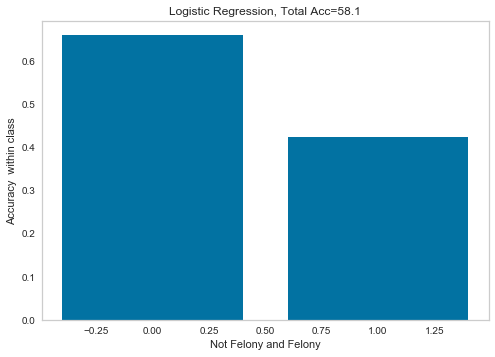

In [71]:
#based on Confusion Matrix
print(per_class_accuracy(y_test,y_hat_lgs))
plot_class_acc(y_test,y_hat_lgs, "Felony",title="Logistic Regression")

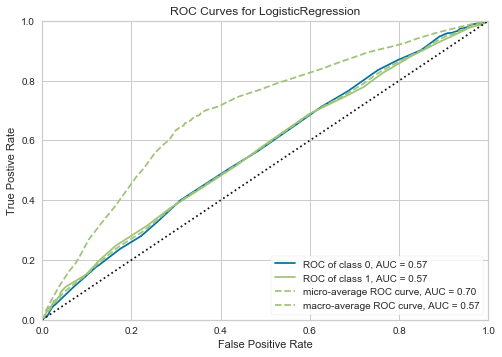

In [72]:
from yellowbrick.classifier import ROCAUC

# Instantiate the classification model and visualizer
logistic = LogisticRegression()
visualizer = ROCAUC(logistic)

visualizer.fit(X_train_scaled, y_train)  # Fit the scaled training data to the visualizer
visualizer.score(X_test_scaled, y_test)  # Evaluate the model on the scaled test data
g = visualizer.poof()

### ***K-Nearest Neighbor Model for Task1***
- K-Nearest Neighbors is for the prediction of values based on training their nearest neighbors by a certain n_neighbors count in order to form classification models to predict the y_hat for the test set. 

- When n_neighbors is 5, the F1 metric is highest at 0.4024 and Performance time 2.26 s.

In [73]:
knnEstimator = KNeighborsClassifier()
cvl = cv_object

parameters = {'n_neighbors': [3,5,7,11]}

#Create a grid search object using the parameters  
svcGridSearch = GridSearchCV(estimator=knnEstimator
                    , n_jobs=-1 # jobs to run in parallel
                    , verbose=1 # low verbosity
                    , param_grid=parameters
                    , cv=cvl # KFolds = 10
                    , scoring='f1')

svcGridSearch.fit(X_train_scaled, y_train)  #used scaled train data
print("The best estimator based on F1 is ", svcGridSearch.best_estimator_)
knn_clf = svcGridSearch.best_estimator_

Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  1.3min finished


The best estimator based on F1 is  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')


In [74]:
%%time
print(knn_clf)

clf = knn_clf

clf.fit(X_train_scaled,y_train)        #used scaled train data
yhat_knn = clf.predict(X_test_scaled)   #used scaled test data
    
total_accuracy = mt.accuracy_score(y_test, yhat_knn)
print ('Accuracy', total_accuracy)
conf = mt.confusion_matrix(y_test,yhat_knn)
print('Confusion matrix:')
print(conf)
print('f1_score:', f1_score(y_test, yhat_knn))
print('Precision:', precision_score(y_test, yhat_knn))
print('Recall:', recall_score(y_test, yhat_knn))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
Accuracy 0.5226449275362319
Confusion matrix:
[[1598 1341]
 [ 767  710]]
f1_score: 0.40249433106575966
Precision: 0.3461725987323257
Recall: 0.48070412999322953
CPU times: user 2.18 s, sys: 6.38 ms, total: 2.19 s
Wall time: 2.17 s


[0.54372235 0.48070413]


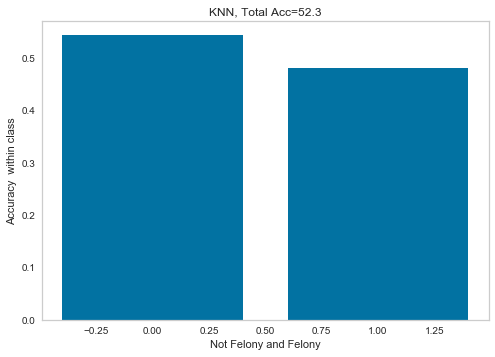

In [75]:
#based on Confusion Matrix
print(per_class_accuracy(y_test,yhat_knn))
plot_class_acc(y_test,yhat_knn, "Felony",title="KNN")

### ***Random Forest for Task1***
- Random forest is for the prediction of values based on training decision trees by by a certain max depth in order to form classification models to predict the y_hat for the test set. 


- Optimization results of F1 for different test values of "max_depth" are printed below. 
- Per the below "max_depth" results value list and the associated line graph, when max_depth is at 51, the F1 metric value starts to plateau at 0.5574.
- Performance time is 15.3s.

max_depth: 1 F1 score: 0.5317491679157905
max_depth: 51 F1 score: 0.5573105801991598
max_depth: 101 F1 score: 0.5573105801991598
max_depth: 151 F1 score: 0.5573105801991598
max_depth: 201 F1 score: 0.5573105801991598
max_depth: 251 F1 score: 0.5573105801991598
max_depth: 301 F1 score: 0.5573105801991598
max_depth: 351 F1 score: 0.5573105801991598
Average F1 score: 0.55 (+/- 0.02)
Average Accuracy 0.6666175937669867
Average Precision: 0.45853365384615385
Average Recall: 0.03873883021933387
Confusion matrix:
[[14393   297]
 [ 7059   327]]
CPU times: user 15.2 s, sys: 50.2 ms, total: 15.2 s
Wall time: 15.2 s


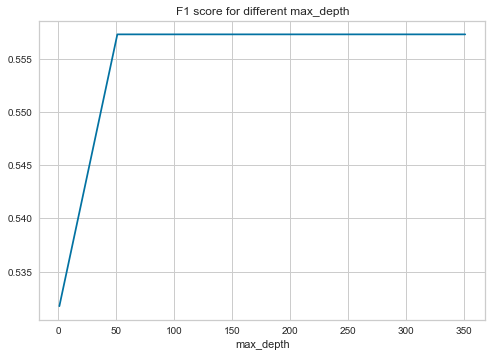

In [76]:
%%time
#Not using GridSearch here
result = []
index = []
f_one_scores = []
accuracy_scores = []
precision_scores = []
recall_scores = []

for max_depth in range(1, 401)[::50]:
    yhat_r = np.zeros(y.shape, dtype=int) # we will fill this with predictions
    skf = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
    for rf_train_index, rf_test_index in skf.split(X, y):
        X_rf_train, X_rf_test = X[rf_train_index], X[rf_test_index]
        y_rf_train, y_rf_test = y[rf_train_index], y[rf_test_index]
        rclf = RandomForestClassifier(max_depth=max_depth,random_state=0, n_estimators=40)
        rclf.fit(X_rf_train, y_rf_train)            
        yhat_r[rf_test_index] = rclf.predict(X_rf_test)        
    f1_score = mt.f1_score(y, yhat_r, average='weighted')
    f_one_scores.append(f1_score)
    print ('max_depth:', max_depth, 'F1 score:', f1_score)
    accuracy = mt.accuracy_score(y, yhat_r)
    accuracy_scores.append(accuracy)
    precision = precision_score(y, yhat_r )
    precision_scores.append(precision)
    recall = recall_score(y, yhat_r )
    recall_scores.append(recall)
    result.append(f1_score)
    index.append(max_depth)


f_one_scores = np.array(f_one_scores)
print("Average F1 score: %0.2f (+/- %0.2f)" % (f_one_scores.mean(), f_one_scores.std() * 2))

accuracy_scores = np.array(accuracy_scores)
print ('Average Accuracy', accuracy_scores.mean())

precision_scores = np.array(precision_scores)
print('Average Precision:', precision_scores.mean())

recall_scores = np.array(recall_scores)
print('Average Recall:', recall_scores.mean())

conf = mt.confusion_matrix(y,yhat_r )
print('Confusion matrix:')
print(conf)

plt.title('F1 score for different max_depth')
pd.Series(result, index=pd.Index(index, name='max_depth'), name='f1_score').plot();

In [77]:
y_hat_rf_score1 =  rclf.predict_proba(X_rf_test)

fpr1 = dict()
tpr1 = dict()
roc_auc1 = dict()

fpr1['RF'], tpr1['RF'], _ = mt.roc_curve(y_rf_test, y_hat_rf_score1[:,1], pos_label=1)
roc_auc1['RF'] = mt.auc(fpr1['RF'], tpr1['RF'])

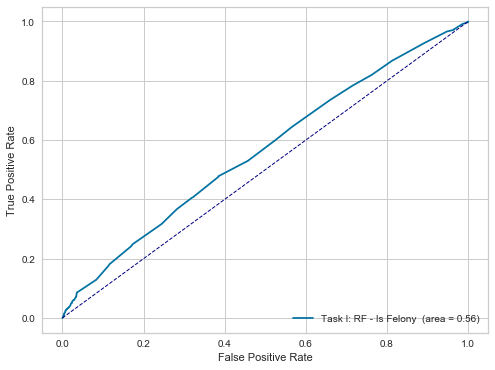

In [78]:
lw=1
plt.figure(figsize=(8,6))
plt.plot(fpr1['RF'], tpr1['RF'], label='Task I: RF - Is Felony  (area = {0:0.2f})'.format( roc_auc1['RF']))
#plt.plot(fpr1['KNN'], tpr1['KNN'], label='Task I: K-Nearest Neighbor - Is Felony (area = {0:0.2f})'.format( roc_auc1['KNN']))
#plt.plot(fpr1['RandomForest'], tpr1['RandomForest'], label='Task I: RandomForest - Is Felony  (area = {0:0.2f})'.format( roc_auc1['RandomForest']))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')


plt.legend(loc="lower right")  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()


<a id="#Modeling_and_Evaluation_3_Task2"></a>

<a href="#top">Back to Top</a>
### Modeling_and_Evaluation_3_Task2

- For Task2 we predict whether the Crime Victim is Female.
- We explore the following three model types with the goal of classifying the likelihood of the crime victim being Female:
    - Logistic Regression
    - K-Nearest Neighbor
    - Random Forest

In [79]:
# preparation for Task 2
# we want to predict the X2 and y2 data as follows:
if 'IsFemale' in newFeatures:
    y2 = newFeatures['IsFemale'].values # get the IsFemale we want
    del newFeatures['IsFemale'] # get rid of the class IsFemale
    X2 = newFeatures.values # use everything else to predict!

iter_num=0
# the indices are the rows used for training and testing in each iteration
for train_indices2, test_indices2 in cv_object.split(X2,y2): 
    X_train2 = X2[train_indices2]
    y_train2 = y2[train_indices2]
    
    X_test2 = X2[test_indices]
    y_test2 = y2[test_indices]
    
# scale attributes by the training set
scl_obj = StandardScaler()
scl_obj.fit(X_train2)
X_train_scaled2 = scl_obj.transform(X_train2) # apply to training
X_test_scaled2 = scl_obj.transform(X_test2)
    
print("done")

done


###  ***Logistic Regression for Task2***

- We use the GridSearchCV module to test different parameters and identify the best parameters to utilize for the Logistic Regression model.


- Performance time is 98.4 ms


- Note: please see section Modeling_and_Evaluation_4 for metric discussions for both Task 1 and Task 2

In [80]:
lgs_clf2 = LogisticRegression(penalty='l2', C=1.0, class_weight=None)

In [81]:
# grid search for the best model
parameters2 = { 'penalty':['l2']
              ,'C': [ 0.001, 0.01, 0.1, 1, 10, 100]
              ,'class_weight': ['balanced']
              ,'random_state': [0]
              ,'solver': ['lbfgs','sag']
              ,'max_iter':[4000, 10000]
             }

#Create a grid search object using the  
regGridSearch2 = GridSearchCV(estimator=lgs_clf2 
                   , n_jobs=-1 # Use all possible jobs to run in parallel
                   , verbose=1 # low verbosity
                   , param_grid=parameters2
                   , cv=cv_object # KFolds = 10
                   , scoring='f1')

#Perform hyperparameter search to find the best combination of parameters for our scaled data
regGridSearch2.fit(X_train_scaled2, y_train2)

Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   10.5s finished


GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=0, test_size=0.2,
            train_size=None),
       error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'penalty': ['l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'class_weight': ['balanced'], 'random_state': [0], 'solver': ['lbfgs', 'sag'], 'max_iter': [4000, 10000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=1)

In [82]:
#Diplay the top model parameters
print(regGridSearch2.best_estimator_)

print('\nThe best f1 score from the search is:', regGridSearch2.best_score_ )

LogisticRegression(C=0.001, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=4000,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=0,
          solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

The best f1 score from the search is: 0.5623154603900478


In [83]:
#Use the best parameters for our Linear Regression object
classifierEst2 = regGridSearch2.best_estimator_

bestScores2 = cross_validate(classifierEst2,X_train_scaled2
                             ,y_train2
                             ,scoring=['accuracy','precision','recall', 'f1']
                             , cv=cv_object
                             , return_train_score=True)

avgAccuracy2 = bestScores2['test_accuracy'].mean()
avgPrecision2 = bestScores2['test_precision'].mean()
avgRecall2 = bestScores2['test_recall'].mean()
avgFone2 = bestScores2['test_f1'].mean()

avgAccStr2 = "Average accuracy for all cv folds is: \t {avgAccuracy2:.5}"
avgPrcStr2 = "Average precision for all cv folds is: \t {avgPrecision2:.5}"
avgRecStr2 = "Average recall for all cv folds is: \t {avgRecall2:.5}"
avgFoneStr2 = "Average fone for all cv folds is: \t {avgFone2:.5}"

print('*********************************************************')
print(avgAccStr2.format(avgAccuracy2=avgAccuracy2))
print(avgPrcStr2.format(avgPrecision2=avgPrecision2))
print(avgRecStr2.format(avgRecall2=avgRecall2))
print(avgFoneStr2.format(avgFone2=avgFone2))
print('*********************************************************')

*********************************************************
Average accuracy for all cv folds is: 	 0.53446
Average precision for all cv folds is: 	 0.57046
Average recall for all cv folds is: 	 0.55619
Average fone for all cv folds is: 	 0.56232
*********************************************************


In [84]:
%%time
# Logistic evaluation on the Test data
# Train the Grid Search Estimator using the whole scaled train data
classifierEst2.fit(X_train_scaled2,y_train2)

# Predict using the scaled test data.
y_hat_lgs2 = classifierEst2.predict(X_test_scaled2)

#Evaluat the scores for the logistic regresion
conf_SearchGrid2 = mt.confusion_matrix(y_test2,y_hat_lgs2)
acc_SearchGrid2 = mt.accuracy_score(y_test2,y_hat_lgs2)
prec_SearchGrid2 = mt.precision_score(y_test2,y_hat_lgs2)
f1_SearchGrid2 = mt.f1_score(y_test2,y_hat_lgs2)

print ("F1_score with Seach Grid Parameters:", f1_SearchGrid2)
print ("Confusion matrix for Logistic Regression with Grid Seach Parameters")
print(pd.DataFrame(mt.confusion_matrix(y_test2,y_hat_lgs2),
             columns=['pred_neg', 'pred_pos'], index=['neg', 'pos']))

F1_score with Seach Grid Parameters: 0.5860927152317881
Confusion matrix for Logistic Regression with Grid Seach Parameters
     pred_neg  pred_pos
neg      1000      1028
pos       972      1416
CPU times: user 172 ms, sys: 1.99 ms, total: 174 ms
Wall time: 50.2 ms


[0.49309665 0.59296482]


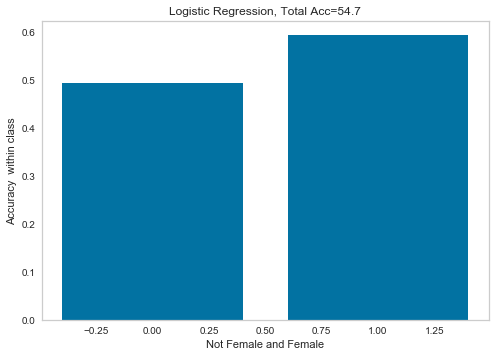

In [85]:
#based on confusion matrix
print(per_class_accuracy(y_test2,y_hat_lgs2))
plot_class_acc(y_test2,y_hat_lgs2,"Female",title="Logistic Regression")

### ***K-Nearest Neighbor for Task2***

- K-Nearest Neighbors is for the prediction of values based on training their nearest neighbors by a certain n_neighbors count in order to form classification models to predict the y_hat for the test set.


- For the Task 2 KNN model, when n_neighbors is 11, the F1 metric is highest at 0.55 and Performance time 2.21s.

In [86]:
knnEstimator2 = KNeighborsClassifier()
cvl2 = cv_object

parameters2 = {'n_neighbors': [3,5,7,11]}

#Create a grid search object using the  
knnGridSearch2 = GridSearchCV(estimator=knnEstimator2
                    , n_jobs=-1 # Use available jobs to run in parallel
                    , verbose=1 # low verbosity
                    , param_grid=parameters2
                    , cv=cvl2 # KFolds = 10
                    , scoring='f1')

knnGridSearch2.fit(X_train_scaled2, y_train2)  # use scaled train data
print("The best estimator based on F1 is ", knnGridSearch2.best_estimator_)
knn_clf2 = knnGridSearch2.best_estimator_

Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  1.4min finished


The best estimator based on F1 is  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=11, p=2,
           weights='uniform')


In [87]:
%%time
print(knn_clf2)

clf2 = knn_clf2

clf2.fit(X_train_scaled2,y_train2)      #used scaled train data
yhat_knn2 = clf2.predict(X_test_scaled2)  #used scaled test data
    
total_accuracy2 = mt.accuracy_score(y_test2, yhat_knn2)
print ('Accuracy', total_accuracy2)
conf2 = mt.confusion_matrix(y_test2,yhat_knn2)
print('Confusion matrix:')
print(conf2)
print('f1_score:', mt.f1_score(y_test2, yhat_knn2))
print('Precision:', precision_score(y_test2, yhat_knn2))
print('Recall:', recall_score(y_test2, yhat_knn2))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=11, p=2,
           weights='uniform')
Accuracy 0.5187952898550725
Confusion matrix:
[[ 990 1038]
 [1087 1301]]
f1_score: 0.550454833932727
Precision: 0.55622060709705
Recall: 0.5448073701842546
CPU times: user 2.31 s, sys: 10.7 ms, total: 2.33 s
Wall time: 2.33 s


[0.48816568 0.54480737]


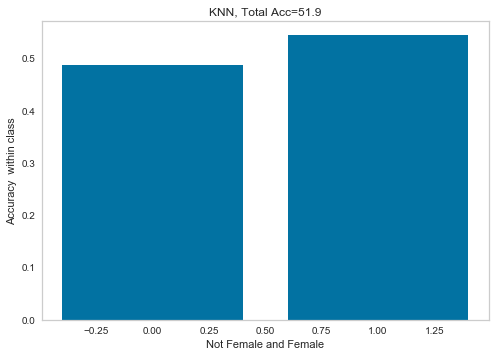

In [88]:
#based on confusion matrix
print(per_class_accuracy(y_test2,yhat_knn2))
plot_class_acc(y_test2,yhat_knn2,"Female",title="KNN")

### ***Random Forest for Task2***


- Optimization results of F1 for different test values of "max_depth" are printed below. 

- Per the below "max_depth" results value list and the associated line graph, when max_depth is at 61, the F1 metric value starts to plateau at 0.4993.   
- Performance time is 21.3s.

max_depth: 11 F1 score: 0.49833732357079347
max_depth: 61 F1 score: 0.4993873720063267
max_depth: 111 F1 score: 0.4993873720063267
max_depth: 161 F1 score: 0.4993873720063267
max_depth: 211 F1 score: 0.4993873720063267
max_depth: 261 F1 score: 0.4993873720063267
max_depth: 311 F1 score: 0.4993873720063267
max_depth: 361 F1 score: 0.4993873720063267
max_depth: 411 F1 score: 0.4993873720063267
max_depth: 461 F1 score: 0.4993873720063267
Average F1 score: 0.50 (+/- 0.00)
Average Accuracy 0.5385124116687805
Average Precision: 0.550148320215936
Average Recall: 0.7943507093091581
Confusion matrix:
[[14393   297]
 [ 7059   327]]
CPU times: user 22.5 s, sys: 121 ms, total: 22.6 s
Wall time: 22.7 s


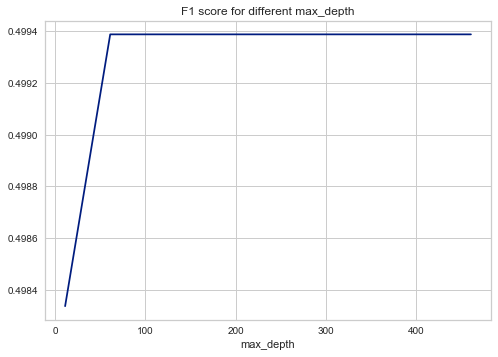

In [97]:
%%time
#Not using GridSearch here
result2 = []
index2 = []
f_one_scores2 = []
accuracy_scores2 = []
precision_scores2 = []
recall_scores2 = []
 

for max_depth2 in range(11, 501)[::50]:
    yhat_r2 = np.zeros(y2.shape, dtype=int) # we will fill this with predictions
    
    skf2 = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
    for rf_train_index2, rf_test_index2 in skf2.split(X2, y2):
        X_rf_train2, X_rf_test2 = X2[rf_train_index2], X2[rf_test_index2]
        y_rf_train2, y_rf_test2 = y2[rf_train_index2], y2[rf_test_index2]
        rclf2 = RandomForestClassifier(max_depth=max_depth2,random_state=0, n_estimators=40)
        rclf2.fit(X_rf_train2, y_rf_train2)            
        yhat_r2[rf_test_index2] = rclf2.predict(X_rf_test2)
    f1_score2 = mt.f1_score(y2, yhat_r2, average="weighted")
    f_one_scores2.append(f1_score2)
    print ('max_depth:', max_depth2, 'F1 score:', f1_score2)
    accuracy2 = accuracy_score(y2, yhat_r2)
    accuracy_scores2.append(accuracy2)
    precision2 = mt.precision_score(y2, yhat_r2 )
    precision_scores2.append(precision2)
    recall2 = mt.recall_score(y2, yhat_r2 )
    recall_scores2.append(recall2)
    result2.append(f1_score2)
    index2.append(max_depth2)


f_one_scores2 = np.array(f_one_scores2)
print("Average F1 score: %0.2f (+/- %0.2f)" % (f_one_scores2.mean(), f_one_scores2.std() * 2))

accuracy_scores2 = np.array(accuracy_scores2)
print ('Average Accuracy', accuracy_scores2.mean())

precision_scores2 = np.array(precision_scores2)
print('Average Precision:', precision_scores2.mean())

recall_scores2 = np.array(recall_scores2)
print('Average Recall:', recall_scores2.mean())

conf = mt.confusion_matrix(y,yhat_r )
print('Confusion matrix:')
print(conf)

plt.title('F1 score for different max_depth')
pd.Series(result2, index=pd.Index(index2, name='max_depth'), name='f1_score2').plot();

<a id="#Modeling_and_Evaluation_4"></a>

<a href="#top">Back to Top</a>

### Modeling_and_Evaluation_4 



### Modeling_and_Evaluation_4_Task1 

Here we evaluate the three different classifiers for Task 1 and determine the model that we would like to use going forward.

First, we look at the Accuracy metric for each model.

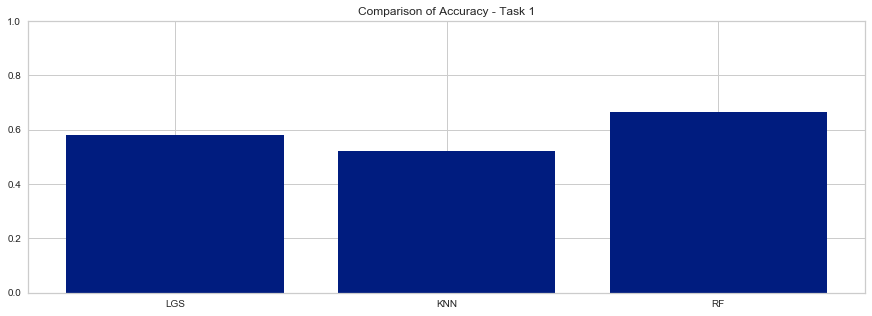

LGS overall Accuracy is  0.5808423913043478
KNN overall Accuracy is  0.5226449275362319
RF overall Accuracy is  0.6667874614966479


In [90]:
accur_lgs = mt.accuracy_score(y_test, y_hat_lgs)
accur_knn = mt.accuracy_score(y_test, yhat_knn)
accur_rf = mt.accuracy_score(y, yhat_r)
x = np.arange(3)

import seaborn as sns
sns.set_palette("dark")
plt.figure(figsize=(15,5))
plt.bar(x,[accur_lgs, accur_knn, accur_rf])
plt.xticks(x, ('LGS', 'KNN', 'RF'))
plt.ylim([0,1])
plt.title('Comparison of Accuracy - Task 1')
plt.show()

print("LGS overall Accuracy is ", accur_lgs)
print("KNN overall Accuracy is ", accur_knn)
print("RF overall Accuracy is ", accur_rf)

- Based on the above bar chart, we see that the model that achieved the highest Accuracy metric for Task 1 was the Random Forest Model. 

Next, let's check the F1 metric and compare it across the three Task 1 models.

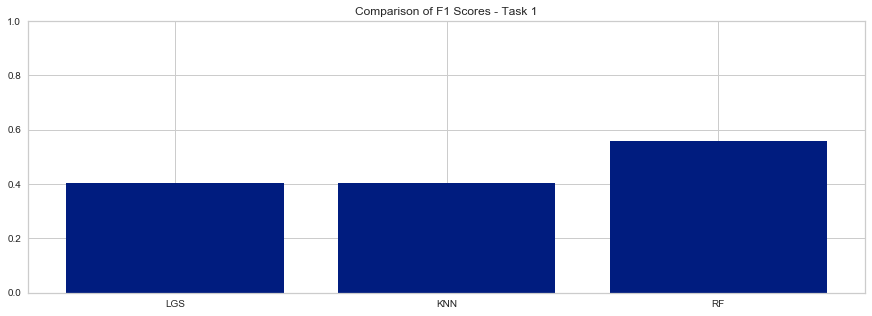

LGS F1 is  0.40348050273928454
KNN F1 is  0.40249433106575966
RF F1 is  0.5573105801991598


In [91]:
f1_lgs = mt.f1_score(y_test, y_hat_lgs)
f1_knn = mt.f1_score(y_test, yhat_knn)
f1_rf = mt.f1_score(y, yhat_r, average='weighted')
x = np.arange(3)

import seaborn as sns
sns.set_palette("dark")
plt.figure(figsize=(15,5))
plt.bar(x,[f1_lgs, f1_knn, f1_rf])
plt.xticks(x, ('LGS', 'KNN', 'RF'))
plt.ylim([0,1])
plt.title('Comparison of F1 Scores - Task 1')
plt.show()

print("LGS F1 is ", f1_lgs)
print("KNN F1 is ", f1_knn)
print("RF F1 is ", f1_rf)

As shown in the above bar chart, the Task 1 Random Forest Model has highest F1 metric value of 0.557 and was the best performing model of the three Task 1 models. 
The Random Forest model is still preferred, even though it was the slowest of the three Task 1 models.

- Interpretation - The Random Forest Model provided the highest overall Accuracy as well as the highest F1 metric value. 
- The primary statistic we will evaluate our model on, as stated earlier, is F1. This is because it focuses on the % of positive cases modeled correctly and the % of positive predictions which are correct. This is consistent with the assumed business/client objectives.

    - In terms of F1, the best model to predict Default is the Random Forest.

    - In general, in terms of F1, Precision and Accuracy metrics, Random Forest performed best. 
    - In general, KNN is behind the other models, with the exception of Recall which it scored highes ton, and the Random Forest model scored lowest.

- While ROC Curves and Precision/Recall curves would normally be interesting in evaluating and comparing models, they are not particularly relevant here because not all models are "score-Based".

- With Random Forest selected as the best of the three models here for Task 1, the next best model for Task 1 is the Logistic Regression model.



<a id="#Modeling_and_Evaluation_4_Task2"></a>

<a href="#top">Back to Top</a>
### Modeling_and_Evaluation_4_Task2 
Here we evaluate the three different classifiers for Task 2 and determine the model that we would like to use going forward.

First, we look at the Accuracy metric for each Task2 model.

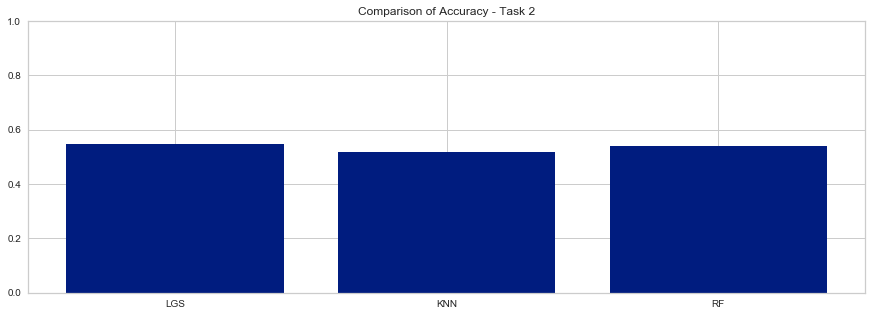

LGS overall accuracy is  0.5471014492753623
KNN overall accuracy is  0.5187952898550725
RF overall accuracy is  0.538503352056532


In [92]:
# TASK 2
accur_lgs2 = mt.accuracy_score(y_test2, y_hat_lgs2)
accur_knn2 = mt.accuracy_score(y_test2, yhat_knn2)
accur_rf2 = mt.accuracy_score(y2, yhat_r2)
x2 = np.arange(3)

import seaborn as sns
sns.set_palette("dark")
plt.figure(figsize=(15,5))
plt.bar(x2,[accur_lgs2, accur_knn2, accur_rf2])
plt.xticks(x2, ('LGS', 'KNN', 'RF'))
plt.ylim([0,1])
plt.title('Comparison of Accuracy - Task 2')
plt.show()

print("LGS overall accuracy is ", accur_lgs2)
print("KNN overall accuracy is ", accur_knn2)
print("RF overall accuracy is ", accur_rf2)

- Based on the above bar chart, we see that the model that achieved the highest Accuracy metric for Task 2 was the Random Forest Model.
- The Random Forest Accuracy for Task 2 was also very close to that of the Logistic Regression Model for Task 2.

Next, let's check the F1 metric and compare it across the three Task 2 models.

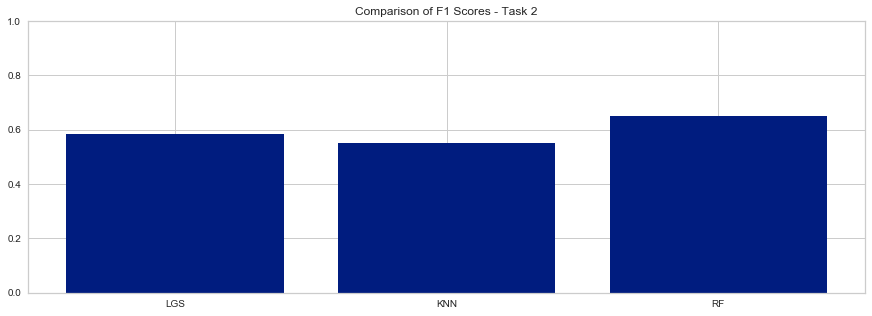

LGS F1 is  0.5860927152317881
KNN F1 is  0.550454833932727
RF F1 is  0.6499690785405071


In [93]:
# TASK 2
f1_lgs2 = mt.f1_score(y_test2, y_hat_lgs2)
f1_knn2 = mt.f1_score(y_test2, yhat_knn2)
f1_rf2 = mt.f1_score(y2, yhat_r2)
x3 = np.arange(3)

import seaborn as sns
sns.set_palette("dark")
plt.figure(figsize=(15,5))
plt.bar(x3,[f1_lgs2, f1_knn2, f1_rf2])
plt.xticks(x3, ('LGS', 'KNN', 'RF'))
plt.ylim([0,1])
plt.title('Comparison of F1 Scores - Task 2')
plt.show()

print("LGS F1 is ", f1_lgs2)
print("KNN F1 is ", f1_knn2)
print("RF F1 is ", f1_rf2)


- Per the above bar charts, the Random Forest model has both the highest Accuracy and F1 metric score. 
- Random Forest is selected as the best of the three models for Task2, and is still preferred, even though it was the slowest of the three Task 2 models.
- While the Performance time is not the best it is still better than that of the Logistic Regression model.  (revisit performance time.)

- With Random Forest selected as the best of the three models here for Task 2, the next best model for Task 2 is the Logistic Regression model.

### Task 1 and Task 2 Models:   Mean Accuracy and Standard Deviation



- *** Credit:  The EvaluateClassifierEstimator function from Dr. Drew's NC Education project GitHub has been modified so as to output Accuracy, Precision, and Recall. We'll use these parameters to evaluate the effectiveness of our model.*


Next, let's look at comparing the models within each Task with respect to Mean Accuracy and Standard Deviation.

In [94]:
# prepare for algorithm comparisons within each Task

## Credit To: https://machinelearningmastery.com/compare-machine-learning-algorithms-python-scikit-learn/
# Compare Algorithms
import pandas

# ***********MODELS FUNCTION*************
# evaluate each model in turn
def Results_analysis(fmodels, fscoring, fX, fy):
    results = []
    names = []
    #scoring = 'accuracy'
    for name, model in fmodels:
        if (fscoring == 'accuracy'):
            #skf = StratifiedKFold(n_splits=10, random_state=seed)
            skf = StratifiedShuffleSplit(n_splits=10, random_state=seed)
        else:
            skf = 10
        cv_results = model_selection.cross_val_score(model, fX, fy, cv=skf, scoring=fscoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
    # boxplot algorithm comparison
    fig = plt.figure()
    fig.suptitle('Algorithm Comparison')
    sns.boxplot(x=names, y=results, palette="Set1")
    plt.show()
    
    return [names, results]

### Models in Task 1 - Is Felonies
- Per the box chart below, based on the Mean Accuracy and Standard Deviation, the Random Forest Classifier and Logistic Regression were the best performing models for Task1.

KNN: 0.632971 (0.019373)
RF: 0.666304 (0.003163)
LGS_RGR: 0.666168 (0.001828)


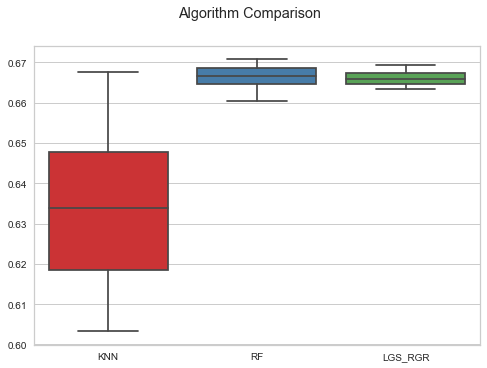

In [95]:
## Credit To: https://machinelearningmastery.com/compare-machine-learning-algorithms-python-scikit-learn/

seed = 7
# prepare models
class_models = []
class_models.append(('KNN', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                                                 metric_params=None, n_jobs=1, n_neighbors=13, p=2,weights='distance')))

class_models.append(('RF', RandomForestClassifier(n_estimators=600, max_depth=None, min_samples_split=2, 
                                                  random_state=0,  n_jobs=-1)))


class_models.append(('LGS_RGR', LogisticRegression()))


classModelResults = Results_analysis(class_models, 'accuracy', X, y)

### Models in Task2 - Is Female
- Per the box plot below, based on the Mean Accuracy and Standard Deviation, the Random Forest Classifier and Logistic Regression were the best performing models for Task 2.

KNN: 0.513632 (0.018516)
RF: 0.546603 (0.005748)
LGS_RGR: 0.549094 (0.007622)


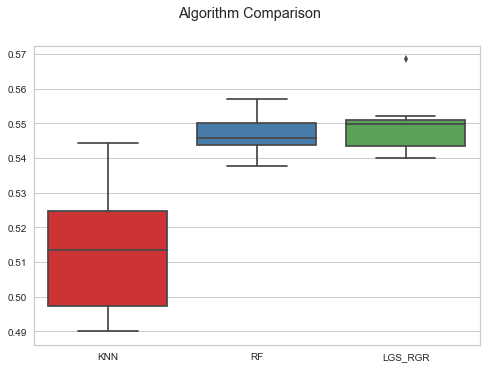

In [96]:
## Credit To: https://machinelearningmastery.com/compare-machine-learning-algorithms-python-scikit-learn/
seed = 7
# prepare models
class_models_R = []

class_models_R.append(('KNN', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                                                   metric_params=None, n_jobs=1, n_neighbors=13, p=2,weights='distance')))

class_models_R.append(('RF', RandomForestClassifier(n_estimators=600, max_depth=None, min_samples_split=2, 
                                                    random_state=0,  n_jobs=-1)))


class_models_R.append(('LGS_RGR', LogisticRegression()))


classModelResults_R = Results_analysis(class_models_R, 'accuracy', X2, y2)

<a id="#Modeling_and_Evaluation_5"></a>

<a href="#top">Back to Top</a>

### Modeling_and_Evaluation_5

### Model Advantages


**KNN**

- KNN is a simple algorithm that predicts unknown data points based on its K nearest neighbors which makes the results easier to interpret.
- Does not make any assumptions on the underlying data distribution which means you don’t have to worry about violating assumptions that other statistical methods depend on.
- Uses distance function to classify new data point which could easily be calculated by hand if necessary
- It is a non-parametric method which means it can be used on data that is not normally distributed.

**Random Forest**

- Popular ensemble method to build predictive models for both classification and regression.
- Simple but intuitive models that utilize a top-down approach in which the root node creates a binary split until a certain criteria is met.
- Each tree tries to estimate a classification, known as "vote".
- We consider each vote from every tree and choose the most voted classification.

**Logistic Regression**
- For maximizing the probability of the data, logistic regression models are generally good. The accuracy of model is acheived at its best in these type of models when data points are distictly separated far away from hyperplane.
- RFE (Recursive Feature Elimination) model chooses the peformance of feature and repeats process until all attibutes are analyzed.
- This is more probablistic model.


**Overall Assessment**
- A key advantage of Random Forest is that by averaging multiple trees, it reduces overfitting, reduces variance from outliers, and as a result produces better accuracy than Logistic Regression and KNN.




In [98]:
# credit: https://machinelearningmastery.com/compare-machine-learning-algorithms-python-scikit-learn/
# credit: https://stackoverflow.com/questions/5389507/iterating-over-every-two-elements-in-a-list
#from math import sqrt
#from scipy import stats
# Iterate Pairwise through models and calculate CI

# IS FELONIES model summary CI function
def modelCiComp(modelResults):
    for i in range(len(classModelResults[0])):
        for j in range(i+1, len(classModelResults[1])):
            m1Acc = classModelResults[1][i]
            m2Acc = classModelResults[1][j]
            d = m1Acc - m2Acc
            dBar = np.mean(d)
            v = np.var(d)
            ci = (1/sqrt(len(m1Acc)))*stats.t.ppf(q = .975, df = len(m1Acc) - 1)*sqrt(v)
            ci = "[" + str(round(dBar - ci, 5)) + ", " + str(round(dBar + ci, 5)) + "]"
            print("95% CI for", classModelResults[0][i], "vs", classModelResults[0][j], "=", ci)
            
# IS FEMALE model summary CI function            
def modelCiComp_1(modelResults):
    for i in range(len(classModelResults_R[0])):
        for j in range(i+1, len(classModelResults_R[1])):
            m1Acc = classModelResults_R[1][i]
            m2Acc = classModelResults_R[1][j]
            d = m1Acc - m2Acc
            dBar = np.mean(d)
            v = np.var(d)
            ci = (1/sqrt(len(m1Acc)))*stats.t.ppf(q = .975, df = len(m1Acc) - 1)*sqrt(v)
            ci = "[" + str(round(dBar - ci, 5)) + ", " + str(round(dBar + ci, 5)) + "]"
            print("95% CI for", classModelResults_R[0][i], "vs", classModelResults_R[0][j], "=", ci)

- ***In comparision with algorithms we used for classification, RandomForest algorithm models outperformed other models. This is clearly represented by accuracy of models, the pairwise comparision with 95% confidence interval of accuracy of models is performed below.***

In [99]:
#Felonies Task1
modelCiComp(classModelResults)

95% CI for KNN vs RF = [-0.04591, -0.02076]
95% CI for KNN vs LGS_RGR = [-0.04631, -0.02008]
95% CI for RF vs LGS_RGR = [-0.00129, 0.00156]


- ***The accuracy of RandomForest and Logistic Regression Models are statistically different as compared with k-NN model. Both RandomForest vs Logistic Regression includes zero in its 95% CI, indicating that these algorithms perform equally and are statistically comparable (i.e. we cannot conclude these two models are statistically different).***

In [100]:
#Females Task2
modelCiComp_1(classModelResults_R)

95% CI for KNN vs RF = [-0.04675, -0.01919]
95% CI for KNN vs LGS_RGR = [-0.05055, -0.02038]
95% CI for RF vs LGS_RGR = [-0.0064, 0.00142]


- ***For Models in Task2 as well, Random Forest and Logistic Regression performed well also. The 95% CI of RandomForest vs Logistic Regression includes zero which indicates that these two models were statistically comparable. (i.e. we cannot conclude these two models are statistically different).******

***Overall, RandomForest algorithm seems to outperform other algorithms for classification tasks. Theoretically, RandomForest algorithm are based on bagging methods as variables are selected per tree. The feature importance is based on probablity distribution and less dependent on hyperparameterization. This also presents with unique advantage for easy interpretation of results.***

<a id="#Modeling_and_Evaluation_6"></a>

<a href="#top">Back to Top</a>

### Modeling_and_Evaluation_6

#### Feature Importance for Task 1 
Utilizing Random Forest, which was the best performing model of the three for Task 1, the feature importance for predicting whether a crime is a Felony was explored below.

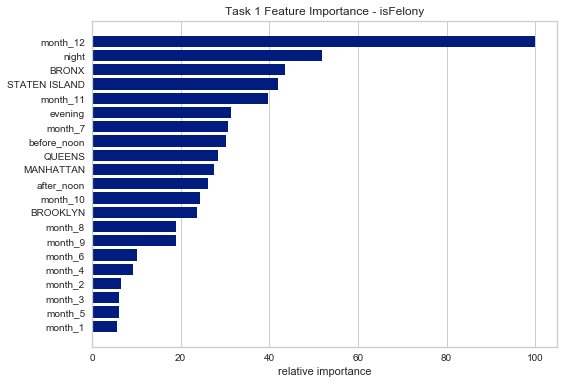

In [104]:
#TASK 1
import matplotlib.pyplot as plt 
from sklearn.ensemble import RandomForestClassifier 
from yellowbrick.features.importances import FeatureImportances

data = Task1Features # as defined in the last step of Task 1

#features.info()

wanted_features = ["month_1","month_10","month_11","month_12","month_2","month_3","month_4","month_5","month_6","month_7","month_8","month_9","after_noon","before_noon","evening","night","BRONX", "BROOKLYN","MANHATTAN","QUEENS","STATEN ISLAND"]

#Extract the instances and target
X = data[wanted_features]
y = data.IsFelony

my_title = "Task 1 Feature Importance - isFelony"

# Create a new matplotlib figure
fig = plt.figure()
ax = fig.add_subplot()
viz = FeatureImportances(RandomForestClassifier(), ax=ax, title=my_title)
viz.fit(X, y)
viz.poof()

Regarding Task 1 Feature Importance:
- The most important feature of our Task 1 Random Forest model for predicting the severity of crime as Felony or non-Felony, is the month of the year. 
- Specifically, the month of December (month_12) seems to be the most important feature followed by the night time of day and the boroughs of the Bronx and Staten Island. 
- The fact that December ended up as the most important attribute was an unexpected result.  Whether this could be attributed to a slight increase in the number of felonies occurring in December would need to be investigated.  “Relative importance” is relative.  While December is significantly more important mathematically for this model and this particular dataset, further investigation is warranted to determine if that result remains consistent across other models and datasets. 
- It’s no surprise that time of day and geographic-related location are potentially important features.  Certain kinds of crime are, by their nature, more severe and certain kinds of crime seems to happen more frequently in certain geographic areas and at certain times of the day.  


#### Feature Importance for Task 2 
Utilizing Random Forest, which was the best performing model of the three for Task 2, the feature importance for predicting whether a crime victim is a Female was explored below.

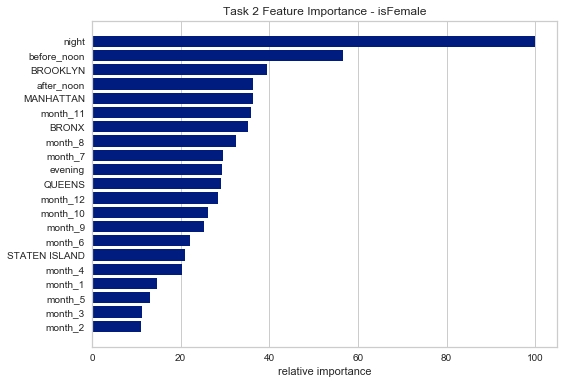

In [103]:
#TASK 2
#import matplotlib.pyplot as pltfrom sklearn.ensemble 
#import RandomForestClassifierfrom yellowbrick.features.importances
#import FeatureImportances
data2 = Task2Features # as defined in the last step of Task 2
wanted_features = ["month_1","month_10","month_11","month_12","month_2","month_3","month_4","month_5","month_6","month_7","month_8","month_9","after_noon","before_noon","evening","night","BRONX", "BROOKLYN","MANHATTAN","QUEENS","STATEN ISLAND"]

# Extract the instances and target
X = data2[wanted_features]
y = data2.IsFemale

my_title = "Task 2 Feature Importance - isFemale"


# Create a new matplotlib figure
fig = plt.figure()
ax = fig.add_subplot()
viz = FeatureImportances(RandomForestClassifier(), ax=ax, title=my_title)
viz.fit(X, y)
viz.poof()

Regarding Task 2 Feature Importance:

- The two most important attributes for our Task 2 Random Forest model predicting if a crime victim is female are related to the time of day.
- Specfically, night and before_noon are the only attributes who have a relative importance well above 40.
- Both of these make some intuitive sense.  
- Women have been cautioned about being alone after dark, paying close attention to their surroundings, walking with a flashlight or keys in hand.  It seems that anecdotal evidence agrees that “night” is strongly correlated with the criminal victimization of women.  
- Likewise, “before_noon” could easily mean dawn or before sunrise which is effectively “night” from a visibility perspective. 


<a id="#Deployment"></a>

<a href="#top">Back to Top</a>

### Deployment

A variety of professionals, companies, and organizations would be interested in the classification and prediction models we have created.  Any entity interested in crime in general, the severity of crimes, or the demographics of crime victims could find uses for models capable of predicting outcomes.  In addition, our models could be modified to successfully classify or predict other categories of crime-related data. 

These models' degree of usefulness depends on context. For example, predicting the severity of a crime isn’t particularly useful once a crime has already been committed.  However, if a law enforcement agency is considering two different crime reduction programs, they could use our model as part of the evaluation process to determine the extent to which one program could result in less severe crimes compared to the other program.  The same could be said if the law enforcement agency wanted to reduce crimes against certain demographic groups.  Our model could help explain changes that law enforcement might expect to see. Civic and human rights organizations might also utilize our model as a tool in aiding research or policy paper development. 

Measuring the value of a model in the real world differs from measuring the model in a classroom.  The value of models like ours to organizations rests in the models' ability to provide information that was previously unavailable or provide information more quickly or at a lower cost to an alternative method.  Another metric might simply be whether or not the model facilitates the organization's goals. In the first case, the value could be measured directly by surveying the users and asking the question:  what would it cost you in time and resources to arrive at these answers using other methods?  Or this question: what advantages do these models provide your organization and what would the impact be if you couldn’t use these models. 

The best way to deploy these models would be either a client/server model for on-premises deployments (a police department) or a software-as-a-service model (for civic and other organizations).  Users could upload their data and receive predictions and classifications.  Far fewer people understand prediction and classification algorithms than can benefit from their use.  Therefore, packaging the algorithms in easy-to-use software and giving them an intuitive interface will make it easier for people to use the models for their intended purposes. 

Models can only be as good as the data used to build them.  As is the case with most models, ours could likely be improved or adjusted to provide different performance characteristics.  In terms of additional data for our models, it depends on the objectives of the users.  If the objective is to understand more about the perpetrators or victims of crime, additional demographic information related to suspects and victims could be useful.  If the objective is to understand more about the geography of crime, additional data about the locations where crime occurs could be useful.  It becomes evident that the time to update a model has arrived when the model no longer performs according to specification.  In other words, when the accuracy of the model begins to drop and the model underperforms over time, the model should probably be updated. Crime is cyclical, local, and personal.  The model should be revisited at least annually and perhaps as often as quarterly.  In addition, the model should be re-evaluated any time there are significant shifts in socioeconomic conditions.  For example, if a factory that employs 18% of the population shuts down, it might be a good idea to update any models that could in any way impacted by unemployment rates or other economic considerations.

<a id="#Exceptional_Work"></a>

<a href="#top">Back to Top</a>

### Exceptional_Work


In a perfect world, datasets used for making predictive models would be randomly sampled, have balanced classes, and have unskewed distribution.  Alas, the world is not perfect.  Most data collected will have some level of bias, class imbalance, and skewness.  Our data was no exception.  

For our first prediction task, the majority of the data was of the class we were trying to predict.  Having a class imbalance in the response variable most certainly impacts the model.  We haven’t mastered the techniques for dealing with unbalanced data, but we did a brief exploration to better understand how our model might be improved with advanced data handling techniques.
We used the imbalanced-learn python package to conduct a “what if” experiment.  That is, could we reasonably expect different/better results if we had a more balanced data set.  The imbalanced-learn package utilizes a process called the Synthetic Minority Oversample Technique or SMOTE.  SMOTE, as the name suggests, is a technique which synthetically oversamples the minority class in a dataset in order to improve balance.  

In our case, SMOTE synthesized additional “non-felony” observations in order to balance out the number of real “is-felony” records in our dataset. The results suggest that in the case of Task 1, predicting whether or not a crime is a felony, we might be able to get different results if we were to base our model on a more balanced dataset.  One approach to attaining a more balanced dataset would be to intentionally employ a less random approach when sampling incidents of reported crime.  In other words, select equal numbers of observations from each class of the response variable for the purposes of building a better model. This is something we will investigate further as a way to improve our models.

In [105]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split

from imblearn import over_sampling as os
from imblearn import pipeline as pl
from imblearn.metrics import (geometric_mean_score,
                              make_index_balanced_accuracy)

In [106]:
RANDOM_STATE = 42


In [109]:
# Split the data
pipeline = pl.make_pipeline(os.SMOTE(random_state=RANDOM_STATE),
                            LinearSVC(random_state=RANDOM_STATE))

data2 = features.join(labels) # as defined in the last step of Task 2
wanted_features = ["month_1","month_10","month_11","month_12","month_2","month_3","month_4","month_5","month_6","month_7","month_8","month_9","after_noon","before_noon","evening","night","BRONX","BROOKLYN","MANHATTAN","QUEENS","STATEN ISLAND"]

# Extract the instances and target
X = data2[wanted_features]
y = data2.IsFelony
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=RANDOM_STATE)

# Train the classifier with balancing
pipeline.fit(X_train, y_train)

# Test the classifier and get the prediction
y_pred_bal = pipeline.predict(X_test)

In [110]:
mysvc = LinearSVC()
# Train the classifier with conventional sklearning
mysvc.fit(X_train, y_train)

# Test the classifier and get the prediction
y_pred_svc = mysvc.predict(X_test)

In [111]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_bal))

             precision    recall  f1-score   support

          0       0.69      0.71      0.70      3664
          1       0.39      0.38      0.39      1855

avg / total       0.59      0.60      0.59      5519



In [112]:
print(classification_report(y_test, y_pred_svc))

             precision    recall  f1-score   support

          0       0.67      0.98      0.80      3664
          1       0.54      0.04      0.08      1855

avg / total       0.63      0.67      0.56      5519



The weighted average f1 score is 0.59 with balanced learning and the weighted average f1 score is 0.56 with conventional sklearning.

<a id="#References"></a>

<a href="#top">Back to Top</a>

### References



- https://machinelearningmastery.com/compare-machine-learning-algorithms-python-scikit-learn/
- https://stackoverflow.com/questions/5389507/iterating-over-every-two-elements-in-a-list
- The EvaluateClassifierEstimator function from Dr. Drew's NC Education project GitHub has been modified so as to output Accuracy, Precision, and Recall. We used these parameters to evaluate model effectiveness.
- Exceptional work: http://imbalanced-learn.org/en/stable/